**Reminder for the objectif to be followed !**

L’objectif de ce projet est d’appliquer la classification non supervisée dans le cadre de la segmentation d’un ensemble de séries temporelles qui représentent la consommation d’électricité de 100 appartements/ménages observée toutes les 30 minutes durant 91 jours consécutifs. Il s’agit en particulier de détecter de manière automatique des ruptures (changements dans les habitudes de consommation) communes à l’ensemble des séries temporelles.

## **Table of contents** 



1.   Importation des librairies / packages nécessaires
2.   Analyse descriptive des données
3.   Réduction de la dimension
     *   ACP - Analyse de Composantes Principales
     *   Caractéristiques des series temporelles
     *   Transformé de Fourier  
4.   Clustering
     *   CAH - Classification Hierarchique
     *   K-means
     *   Spectral Clustering
     *   SOM
5.    Analyse sur clusters
6.    Ruptures - segmentation 












# **1. Import des librairies / packages**

In [3]:
!pip install tslearn
!pip install minisom
!pip install ruptures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=37b485afaaaa7dcc2c0da7f70c5af7f2033f838befb23de08e65fd6811f33c6a
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 998 kB 4.3 MB/s 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import calendar
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
import ruptures as rpt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

# **2. Analyse descriptive des données**

### 2.1 import data

In [6]:
read_file = pd.read_csv (r'/content/data.txt', header=None, sep=' ')
read_file.to_csv (r'/content/data.csv', header=None, index=None)
series=pd.read_csv('/content/data.csv', header=None)
series

0         1         2         3         4         5         6     \
0  -1.786785 -1.759306 -1.731826 -1.657497 -1.504801 -1.303554 -1.099353   
1  -1.696926 -1.589682 -1.482438 -1.438186 -1.504610 -1.668164 -1.880164   
2   0.152293 -0.001868 -0.156029 -0.260148 -0.283644 -0.273770 -0.282275   
3  -0.951338 -1.038791 -1.126245 -1.259050 -1.456028 -1.629866 -1.693202   
4  -1.117863 -1.209420 -1.300976 -1.335880 -1.282855 -1.212149 -1.186737   
..       ...       ...       ...       ...       ...       ...       ...   
95 -1.476726 -1.384780 -1.292834 -1.316479 -1.520947 -1.770050 -1.916043   
96 -0.147306 -0.628073 -1.108839 -1.478275 -1.658697 -1.707026 -1.701723   
97 -1.459160 -1.487654 -1.516149 -1.488817 -1.382944 -1.308259 -1.363864   
98 -1.636396 -1.735798 -1.835200 -1.902854 -1.915313 -1.882320 -1.817190   
99 -0.587143 -0.958683 -1.330222 -1.661032 -1.914792 -2.072828 -2.112098   

        7         8         9     ...      4358      4359      4360      4361  \
0  -0.939600 -0.834307 -0.642136  ...  0.806520  0.842348  0.743352  0.572553   
1  -2.012606 -1.950127 -1.707242  ...  0.816715  0.736486  0.683914  0.606173   
2  -0.301053 -0.309397 -0.296038  ...  0.744458  0.848834  0.797598  0.611185   
3  -1.664615 -1.575958 -1.406233  ...  0.487786  0.574832  0.558728  0.570994   
4  -1.139009 -0.997874 -0.808915  ...  0.674229  0.712476  0.649029  0.493149   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95 -1.966382 -1.949685 -1.824007  ...  0.524595  0.629315  0.769022  0.837379   
96 -1.672829 -1.605088 -1.350490  ...  0.803852  1.014642  1.108927  1.038618   
97 -1.473904 -1.517791 -1.370945  ...  0.368506  0.518264  0.741340  0.945640   
98 -1.714326 -1.560443 -1.330420  ...  0.387744  0.291293  0.328930  0.477352   
99 -1.974451 -1.626850 -1.171809  ...  0.629779  0.761291  0.840578  0.876214   

        4362      4363      4364      4365      4366      4367  
0   0.394154  0.236707  0.127456  0.124078  0.266715  0.494930  
1   0.432088  0.194261 -0.057964 -0.312055 -0.565359 -0.817930  
2   0.326360  0.000687 -0.303251 -0.523594 -0.621051 -0.645872  
3   0.724730  0.867772  0.837370  0.693679  0.533052  0.373722  
4   0.270269  0.047190 -0.111916 -0.194744 -0.208145 -0.183737  
..       ...       ...       ...       ...       ...       ...  
95  0.742844  0.522179  0.223564 -0.187463 -0.742874 -1.382051  
96  0.787709  0.439469  0.089793 -0.214186 -0.450071 -0.645637  
97  1.016281  0.891805  0.565214  0.193923 -0.069454 -0.255923  
98  0.680531  0.842687  0.885235  0.838111  0.751590  0.648769  
99  0.875033  0.782792  0.545727  0.173050 -0.305220 -0.838818  

[100 rows x 4368 columns]

### 2.2 Transformation des données en un format plus lisible

In [7]:
df=series.T

In [8]:
l=[] #liste des appartements 
for i in range (1,df.shape[1]+1):
  num_appart="appt_"+str(i)
  l.append(num_appart)
df.columns=l
df.head()

appt_1    appt_2    appt_3    appt_4    appt_5    appt_6    appt_7  \
0 -1.786785 -1.696926  0.152293 -0.951338 -1.117863 -0.619164 -1.934051   
1 -1.759306 -1.589682 -0.001868 -1.038791 -1.209420 -0.809750 -1.509850   
2 -1.731826 -1.482438 -0.156029 -1.126245 -1.300976 -1.000337 -1.085648   
3 -1.657497 -1.438186 -0.260148 -1.259050 -1.335880 -1.216261 -0.803368   
4 -1.504801 -1.504610 -0.283644 -1.456028 -1.282855 -1.465663 -0.755584   

     appt_8    appt_9   appt_10  ...   appt_91   appt_92   appt_93   appt_94  \
0 -1.231540 -0.915803 -0.414599  ... -1.458296 -0.943808 -1.058543  0.094067   
1 -1.642594 -0.966073 -0.626387  ... -1.435501 -1.081751 -1.189145 -0.598292   
2 -2.053648 -1.016343 -0.838176  ... -1.412706 -1.219694 -1.319748 -1.290650   
3 -2.301650 -1.110622 -0.999818  ... -1.436107 -1.420951 -1.482136 -1.813262   
4 -2.273051 -1.274301 -1.079398  ... -1.532445 -1.707280 -1.683049 -2.036025   

    appt_95   appt_96   appt_97   appt_98   appt_99  appt_100  
0 -0.551474 -1.476726 -0.147306 -1.459160 -1.636396 -0.587143  
1 -0.770247 -1.384780 -0.628073 -1.487654 -1.735798 -0.958683  
2 -0.989019 -1.292834 -1.108839 -1.516149 -1.835200 -1.330222  
3 -1.223024 -1.316479 -1.478275 -1.488817 -1.902854 -1.661032  
4 -1.482356 -1.520947 -1.658697 -1.382944 -1.915313 -1.914792  

[5 rows x 100 columns]

In [9]:
#let's add timestamp to our dataset
df.insert(0, 'Time', pd.date_range(start='1/1/2022', periods=len(df), freq='30min'))
df.head()

Time    appt_1    appt_2    appt_3    appt_4    appt_5  \
0 2022-01-01 00:00:00 -1.786785 -1.696926  0.152293 -0.951338 -1.117863   
1 2022-01-01 00:30:00 -1.759306 -1.589682 -0.001868 -1.038791 -1.209420   
2 2022-01-01 01:00:00 -1.731826 -1.482438 -0.156029 -1.126245 -1.300976   
3 2022-01-01 01:30:00 -1.657497 -1.438186 -0.260148 -1.259050 -1.335880   
4 2022-01-01 02:00:00 -1.504801 -1.504610 -0.283644 -1.456028 -1.282855   

     appt_6    appt_7    appt_8    appt_9  ...   appt_91   appt_92   appt_93  \
0 -0.619164 -1.934051 -1.231540 -0.915803  ... -1.458296 -0.943808 -1.058543   
1 -0.809750 -1.509850 -1.642594 -0.966073  ... -1.435501 -1.081751 -1.189145   
2 -1.000337 -1.085648 -2.053648 -1.016343  ... -1.412706 -1.219694 -1.319748   
3 -1.216261 -0.803368 -2.301650 -1.110622  ... -1.436107 -1.420951 -1.482136   
4 -1.465663 -0.755584 -2.273051 -1.274301  ... -1.532445 -1.707280 -1.683049   

    appt_94   appt_95   appt_96   appt_97   appt_98   appt_99  appt_100  
0  0.094067 -0.551474 -1.476726 -0.147306 -1.459160 -1.636396 -0.587143  
1 -0.598292 -0.770247 -1.384780 -0.628073 -1.487654 -1.735798 -0.958683  
2 -1.290650 -0.989019 -1.292834 -1.108839 -1.516149 -1.835200 -1.330222  
3 -1.813262 -1.223024 -1.316479 -1.478275 -1.488817 -1.902854 -1.661032  
4 -2.036025 -1.482356 -1.520947 -1.658697 -1.382944 -1.915313 -1.914792  

[5 rows x 101 columns]

### 2.3 - Aggregation mensuel et journalière des données
Nous ne voulons pour l'instant faire qu'une visualisation sommaire afin de mieux comprendre nos données, nous allons donc agréger les consommations **par mois** et **par semaine**. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Columns: 101 entries, Time to appt_100
dtypes: datetime64[ns](1), float64(100)
memory usage: 3.5 MB


In [11]:
df_month = df.copy()# création d'un dataframe retraçant la consommation mensuelle
df_month['Month'] = df_month['Time'].astype(str).str[5:7] ## 7 permet de ne garder que ce qui correspond au mois dans la série de caractères.
df_month['Month'] = df_month['Month'].transform(int, axis = 0) # permet que le mois soit un entier plutôt qu'une chaîne de caractères.
df_month = df_month.groupby('Month').sum()

In [12]:
df_day = df.copy()
df_day["Day"] = df_day['Time'].astype(str).str[5:10]
df_day =  df_day.groupby(["Day"]).sum()
df_day = df_day.reset_index(drop = False)

In [13]:
df_day.head()

Day     appt_1    appt_2    appt_3    appt_4    appt_5     appt_6  \
0  01-01  10.695612  2.707761  1.647498 -5.904153 -2.661249   0.654775   
1  01-02   3.317783  0.418042  0.443568  3.828257  1.062960   1.491268   
2  01-03   1.816731 -3.906145  2.425824 -3.463101 -2.683973  11.444573   
3  01-04  -0.170942  0.755987  0.070307 -1.734172  4.439202   6.108568   
4  01-05   9.427071  0.170686  1.081296  1.078066 -1.972080  -5.661369   

     appt_7    appt_8    appt_9  ...    appt_91   appt_92   appt_93   appt_94  \
0 -1.157198 -2.259596  2.908255  ...  -3.991519 -1.734392  0.876962 -2.435284   
1 -0.203413  0.929008  8.298131  ...   2.156356 -1.475652 -1.986360 -1.328565   
2  0.517418  0.066906  1.924546  ... -12.081914 -4.045812  3.777372 -3.555868   
3 -5.108810  2.151468  4.823757  ...   0.404964  2.223912  1.802795  4.237884   
4  3.067871  1.375589 -5.263518  ...  -3.896672 -1.863383  3.898508  5.057182   

    appt_95   appt_96    appt_97   appt_98   appt_99  appt_100  
0 -1.460960 -7.802755  -5.488774  2.512723  0.038179  1.193993  
1 -3.933832 -1.167473  -2.837245  2.296679 -0.674502 -0.483624  
2  1.854796 -6.746188  -6.590368 -1.203642  1.757036 -4.484738  
3 -7.549328  0.063060 -10.240349  8.447088  0.233395  6.750551  
4  4.731564  7.866515   1.337738 -4.375373  2.891689  5.147485  

[5 rows x 101 columns]

### 2.4- Representation Graphique des données à une échelle mensuelle et Journalière

Maintenant tout est en place pour pouvoir représenter graphiquement les courbes de consommation. 
Nous implémentons ci-dessous une fonction **graph_consos** qui nous permet d'afficher les profils que nous voulons, en agrégeant **par la moyenne des données individuelles au niveau mensuel ou journalier**. 

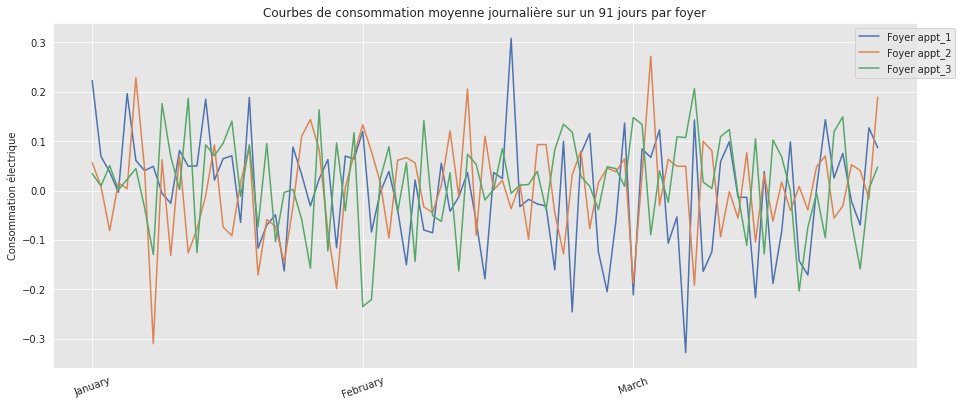

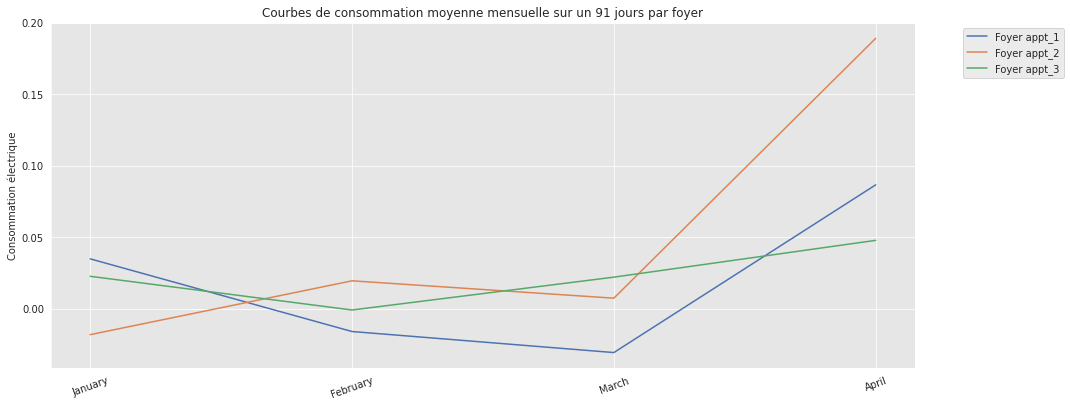

In [14]:
def graph_consos(DataFrame, time , liste_profils):
    x = DataFrame.copy()
    temp = df.copy()
    #On utilise la fonction copy pour ne pas modifier le DataFrame considéré
    if time == 'Month':
        k = 7 #mois
        s = 1
        mode = 'mensuelle'
    else:
        k = 10 #jours
        s = 31
        mode = 'journalière'
    
    temp[time] = temp["Time"].astype('str').str[5:k]
    temp = temp.groupby(time).mean()
    x[time] = x['Time'].astype('str').str[5:k]
    x = x.groupby(time).mean()
    
    fig = plt.figure(figsize = [12, 4.8])
    a1 = fig.add_axes([0,0,1,1]) 
    a1.set_ylabel('Consommation électrique')
    plt.xticks(np.arange(len(x), step = s), calendar.month_name[1:6]+calendar.month_name[7:12], rotation=20)  
    plt.title('Courbes de consommation moyenne %s sur un 91 jours par foyer' % mode)
    
    for profil in liste_profils:
        plt.plot(x[profil], label= 'Foyer %s' % profil) #boucle if qui permet de toujours avoir une belle légende
    
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

graph_consos(DataFrame = df, time='Week', liste_profils = ["appt_1", "appt_2", "appt_3"])
graph_consos(df, time = 'Month', liste_profils = ["appt_1", "appt_2", "appt_3"])
  

L'agrégation des données à une échelle mensuelle / journalière semble écraser considérablement la variabilité des données, mais elle donne un aperçu des habitudes de consommation des différents ménages, et constitue une première technique d'agrégation des données. 
Afin de pouvoir analyser des comportements plus fins et plus subtils, nous pouvons aussi regarder des courbes tq la consommation journalière moyenne de certains ménages. 

-> La fonction ci-dessous nous permet de représenter **la semaine de consommation de notre choix pour un ménage**. 


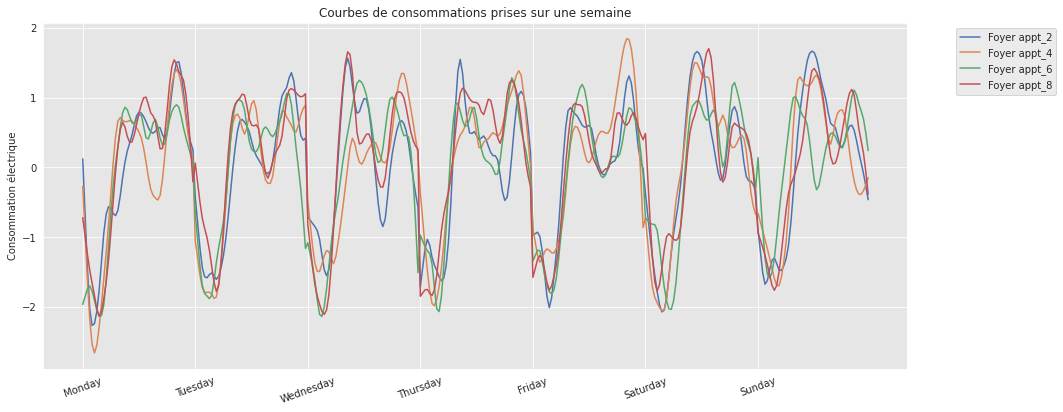

In [15]:
def graph_conso_semaine(DataFrame, liste_profils , semaine , plot): 
    
    x = DataFrame.copy()
    temp = df.copy()
    x = x.drop(columns = 'Time')
    temp = temp.drop(columns = 'Time')
    
    n = x.shape[0]
    
    if semaine > n/(7*48):
        return('Semaine trop grande')
    else : 
        init = (semaine-1)*7*48 #7 jours dans la semaine et 48 fois une demi-heure par jour
        end = (init+7*48)
        data = x.iloc[init:end]
        temperature = temp.iloc[init:end]
        
    if plot == True : 
        fig = plt.figure(figsize = [12, 4.8])
        a1 = fig.add_axes([0,0,1,1]) 
        a1.set_ylabel('Consommation électrique')  
        plt.title('Courbes de consommations prises sur une semaine')
        plt.xticks(np.arange(init, end, step = 48), calendar.day_name[0:8], rotation=20)
        for profil in liste_profils:
            plt.plot(data[profil], label= 'Foyer %s' % profil) 

        plt.legend(bbox_to_anchor=(1.05, 1))
        return(plt.show())
    else : 
        return(pd.DataFrame(data[profil] for profil in liste_profils).transpose().reset_index(drop = True))


graph_conso_semaine(df, ["appt_2", "appt_4", "appt_6",'appt_8'] , 12 , plot= True)


La fonction graphique précedente nous permet de mieux comprendre le comportement des différents profils. Sur le graphique obtenu, celui qui montre la consommation sur une semaine donnée, les pics sont relativement élevés, on remarque notamment que les consommation des 4 foyers varie beaucoup.  Le graphique semble suggérer ici que appt_8 mange chez lui à midi le Lundi et Jeudi et utilise des appareils ménagers, tandis que appt_4 ne rentre chez lui que le soir, bien qu'il consomme beaucoup plus le soir. Il semble aussi que appt_6 consomme l'electricité beaucoup plus le matin (peut-être qu'il allume la télévison ou qu'il utilise d'autres appareil qui consomme l'electricité le matin). Nous pouvons même remarquer que l'ensemble des ménages consomme beaucoup plus l'energie electrique le week-end surtout le Samedi; cela peut-être expliquer par le fait qu'ils passent souvent plus de temps chez eux le week-end.

En géneral, les fonctions graphiques précédentes seront très utiles pour visualiser les différences entre les différents groupes obtenus par notre clustering. Nous en implémentons une dernière qui permet de visualiser la consommation moyenne par jour.

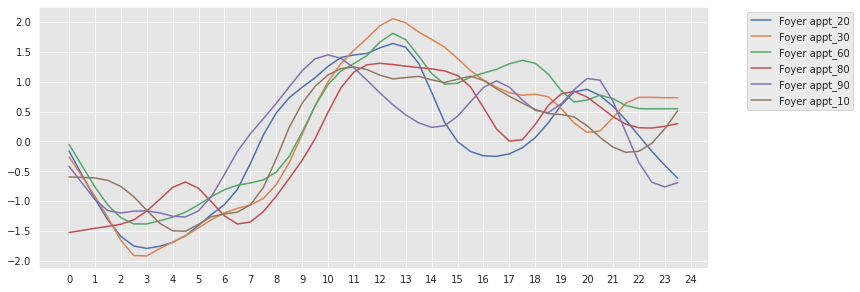

In [16]:
import datetime
import matplotlib.dates as mdates

liste_des_jours = pd.unique(df['Time'].astype('str').str[5:10])

def valeurs_journee(df, profil, journee):
    df_day = df[df["Time"].astype('str').str[5:10] == journee][profil]
    d1 = pd.DataFrame(df_day).reset_index(drop = True)
    return(d1)

def journee_moyenne(df, profil):
    d1 = valeurs_journee(df, profil, liste_des_jours[0])
    for jour in liste_des_jours[1:]:
        d2 = valeurs_journee(df, profil, jour)
        d1 = pd.concat([d1, d2], axis=1)
    d1 = d1.apply(np.mean, 1)
    return(pd.DataFrame(d2))

def journee_moyenne_liste(df, liste_profils, plot):
    if plot == True: 
        fig = plt.figure(figsize = [12, 4.8])
        for profil in liste_profils:
            plt.plot(journee_moyenne(df, profil), label= 'Foyer %s' % profil)
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xticks(np.arange(0,50, step=2), np.arange(25))
        return(plt.show())
        
    else : 
        d1 = journee_moyenne(df, liste_profils[0])
        for profil in liste_profils[1:]:
            d2 = journee_moyenne(profil)
            d1 = pd.concat([d1, d2], axis = 1)
        return(d1)

journee_moyenne_liste(df, ["appt_20", "appt_30", "appt_60","appt_80", "appt_90", "appt_10"], plot = True)


L'exemple ci-dessus nous montre que **probablement** nos données ne présentent pas une variation forte de la consommation brute entre les individus : les courbes suggérent qu'il y en a pas un leger dépassement entre la consommation d'un ménage d'un autre. Les différences de comportement entre les menages sont beaucoup moins évidentes visuellement parlant. **Mais** cela n'est déduit qu'en se basant sur un ensemble réduit de ménages, rien ne peut nous assurer que c'est le cas pour toutes les données. Donc **afin d'éviter** le fait que notre algorithme de clustering aussi identifie la consommation des ménages qui sont beaucoup plus élevée que les autres en faisant un groupe avec et un autre avec les ménages à faible consommation ET **afin de se concentrer sur les différences de comportement**, il pourrait être intéressant de normaliser chaque courbe afin que les différences de consommation brutes ne soient pas identifiées par l'algorithme de clustering.  

### **Normalisation**

Comme nous venons de le dire, nous sommes probablement plus intéressés par l'explication des différences fines de comportement entre consommateurs que par les différences " brutes " de consommation. Nous sommes beaucoup plus intéressés par la forme de leurs séries temporelles que par la moyenne de leurs valeurs, et donc la normalisation sur les différents profils nous a semblé être une bonne idée 



In [17]:
df_to_scale = df_day.set_index('Day')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_to_scale)

df_scaled = pd.DataFrame(df_scaled)

df_scaled.describe()

0             1             2             3             4   \
count  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean  -3.172066e-17 -3.660076e-17 -9.150190e-18 -3.919331e-17  4.880101e-17   
std    1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00   
min   -2.888745e+00 -3.265730e+00 -2.607497e+00 -1.853625e+00 -2.189280e+00   
25%   -5.981033e-01 -6.412752e-01 -5.767620e-01 -7.589852e-01 -6.650516e-01   
50%    2.090787e-01  1.176206e-01  1.928203e-02  3.529423e-02 -7.336114e-02   
75%    6.390468e-01  6.336136e-01  8.027956e-01  7.084633e-01  7.675513e-01   
max    2.756936e+00  2.777406e+00  1.986096e+00  2.398131e+00  2.694077e+00   

                 5             6             7             8             9   \
count  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean   2.928061e-17 -2.440051e-18 -7.320152e-18  1.220025e-17 -2.684056e-17   
std    1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00   
min   -2.443458e+00 -2.287049e+00 -2.198790e+00 -2.521146e+00 -2.421726e+00   
25%   -6.511284e-01 -6.059852e-01 -6.645619e-01 -8.057903e-01 -7.745588e-01   
50%   -6.923967e-02 -5.597430e-02 -1.093622e-01  9.744472e-02 -4.773094e-02   
75%    5.080176e-01  6.081552e-01  6.168350e-01  6.109655e-01  6.087123e-01   
max    2.687092e+00  2.132675e+00  2.512373e+00  2.696748e+00  2.664083e+00   

       ...            90            91            92            93  \
count  ...  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean   ... -2.440051e-18 -1.570783e-17  3.172066e-17 -1.708035e-17   
std    ...  1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00   
min    ... -2.641514e+00 -2.401111e+00 -2.382653e+00 -3.703438e+00   
25%    ... -6.473873e-01 -6.145505e-01 -5.518629e-01 -3.558065e-01   
50%    ... -5.422370e-02  5.370443e-02 -8.019602e-02  9.560399e-02   
75%    ...  6.018754e-01  5.802279e-01  4.902962e-01  5.929271e-01   
max    ...  2.522901e+00  2.400581e+00  3.948978e+00  2.189686e+00   

                 94            95            96            97            98  \
count  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean   2.684056e-17  4.880101e-18  9.760202e-18 -2.135044e-17 -1.464030e-17   
std    1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00   
min   -2.217479e+00 -2.039797e+00 -2.460237e+00 -2.885141e+00 -2.512289e+00   
25%   -6.745028e-01 -6.866298e-01 -6.273504e-01 -6.749090e-01 -6.095979e-01   
50%    5.130790e-02 -1.032230e-01  7.876729e-02 -3.223327e-02 -1.186707e-01   
75%    6.357927e-01  5.972510e-01  6.828362e-01  7.260026e-01  7.529322e-01   
max    2.775379e+00  2.908314e+00  2.385864e+00  2.134562e+00  2.448382e+00   

                 99  
count  9.100000e+01  
mean   5.795120e-18  
std    1.005540e+00  
min   -3.518568e+00  
25%   -6.063911e-01  
50%   -8.661057e-03  
75%    7.256501e-01  
max    2.450435e+00  

[8 rows x 100 columns]

Représentons les données normalisées graphiquement :

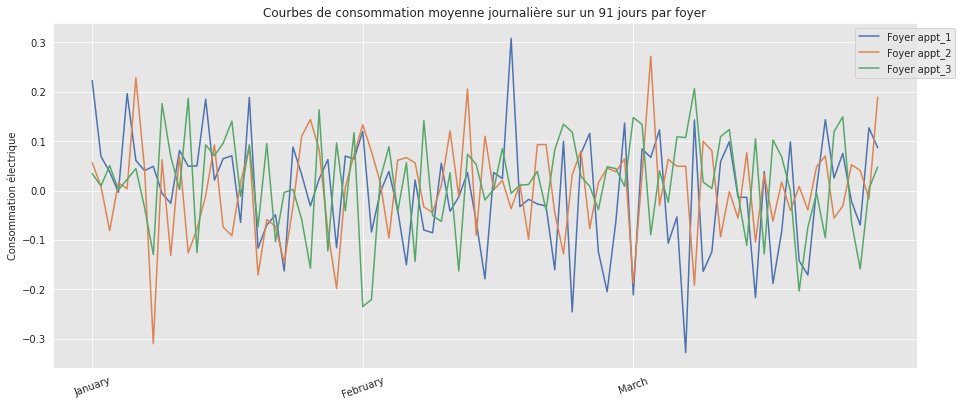

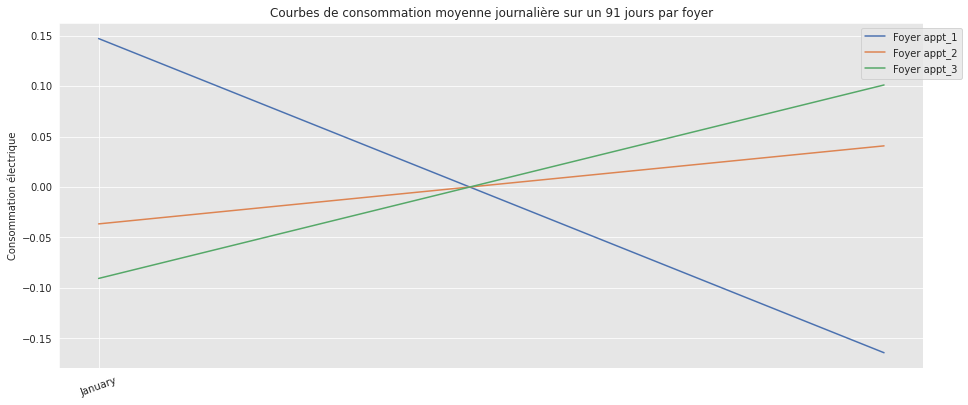

In [18]:
df_scaled_graph = df_scaled.copy()

df_scaled_graph.columns = df.columns[1:]

df_scaled_graph['Time'] = df['Time']


graph_consos(df, time='Week', liste_profils = ["appt_1", "appt_2", "appt_3"])
graph_consos(df_scaled_graph, time='Week',liste_profils = ["appt_1", "appt_2", "appt_3"])


# **4. Reduction de dimension & Extraction des caractéristiques**

Cette partie est consacrée aux techniques permettant la réduction de dimension et l'extraction des caractéristiques.

Tout d'abord, afin de pouvoir établir des profils de consommation, il est important de réduire notre nombre de caractéristiques et d'agréger nos données, afin d'y voir plus clair. L'agrégation de la consommation par mois ou par jour était une façon de réduire la dimensionnalité, de façon très grossière et arbitraire, mais elle montre que pour réussir le problème de clustering et éviter que les algorithmes ne soient trop longs, il faut représenter les séries temporelles de consommation par des indicateurs, moins nombreux, mais avec le moins de variance possible. Il est nécessaire d'extraire de cette série ce qui la caractérise le plus, afin d'obtenir un clustering réellement efficace.

Nous avons identifié 3 façons possibles de réduire la dimension de nos données et d'extraction des caractéristiques :
1. Premièrement, appliquer un **ACP** sur les données, afin d'optimiser mathématiquement la perte de variance, mais sans avoir de caractéristiques interprétables.
2. Recréer nos propres caractéristiques, en s'inspirant des techniques d'analyse des séries temporelles. Cela nous permet cette fois d'avoir des caractéristiques très facilement interprétables, mais pas nécessairement optimisées pour le clustering.
3. La **Transformation de Fourier**


### **3.1 Principal component analysis (PCA)**

L'objectif de l'analyse en composantes principales est de représenter un nuage de points par sa projection sur le sous-espace affine de dimension k minimisant l'inertie. Ici, nous avons près de 4368 données différentes pour chacun des foyers, et nous aimerions réduire à un nombre de caractéristiques suffisant pour expliquer 90% de la variabilité des données.

Pour que l'ACP fonctionne, nous devons à nouveau normaliser les données, mais cette fois-ci par **caractéristiques**. En effet, sans cette normalisation, l'ACP ne sélectionnerait que les caractéristiques ayant le plus de variance, car garder ces caractéristiques permet de garder le plus de variance possible. Dans notre cas, cela reviendrait à ne regarder que les moments où il y a le plus de différences brutes de consommation, ce que nous ne voulons pas, car nous voulons identifier et cibler les différences de comportement à tout moment.

Ceci permet que certaines dates ne prennent pas plus d'importance que d'autres, et donc que l'ACP permette de faire une réelle réduction de dimension. 


In [32]:
scaler_acp = StandardScaler()

df_scaled_to_acp = scaler.fit_transform(df_scaled.transpose())

df_scaled_to_acp = pd.DataFrame(df_scaled_to_acp)

df_scaled_to_acp.describe()

0             1             2             3             4   \
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean  -3.358425e-17 -1.956768e-17  4.107825e-17 -2.886580e-17 -7.660539e-17   
std    1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00   
min   -2.340248e+00 -2.650680e+00 -2.735055e+00 -2.149471e+00 -2.803177e+00   
25%   -6.929974e-01 -5.457336e-01 -6.796781e-01 -5.221553e-01 -6.050446e-01   
50%   -4.145874e-02  1.923822e-02 -3.067843e-02 -4.342826e-02  1.309274e-01   
75%    6.618519e-01  5.778678e-01  6.306636e-01  5.533096e-01  7.250219e-01   
max    2.296146e+00  2.509379e+00  2.611311e+00  3.900113e+00  2.009252e+00   

                 5             6             7             8             9   \
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean  -4.024558e-18 -1.165734e-16 -1.887379e-17  3.247402e-17  4.996004e-18   
std    1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00   
min   -2.471829e+00 -2.817411e+00 -3.075279e+00 -2.993520e+00 -2.899892e+00   
25%   -7.314096e-01 -6.852457e-01 -5.763264e-01 -6.839264e-01 -6.799468e-01   
50%    1.258871e-01  9.701606e-03  4.364113e-02  2.513445e-02  1.442338e-01   
75%    5.835691e-01  6.520393e-01  5.939330e-01  5.659823e-01  6.371207e-01   
max    2.546364e+00  2.577429e+00  2.202448e+00  2.238482e+00  2.062382e+00   

       ...            81            82            83            84  \
count  ...  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean   ...  2.465042e-17  5.107026e-17  2.498002e-18 -4.218847e-17   
std    ...  1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00   
min    ... -2.365727e+00 -2.346267e+00 -2.639807e+00 -2.467038e+00   
25%    ... -5.867771e-01 -6.667655e-01 -6.817302e-01 -6.848685e-01   
50%    ... -5.770850e-02  5.651883e-02  3.630989e-03 -8.522491e-02   
75%    ...  7.326426e-01  5.811675e-01  6.434752e-01  5.126661e-01   
max    ...  2.094321e+00  2.516738e+00  2.526539e+00  2.331427e+00   

                 85            86            87            88            89  \
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean   3.677614e-17 -4.440892e-17  1.998401e-17  7.938095e-17 -6.883383e-17   
std    1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00  1.005038e+00   
min   -2.821334e+00 -1.893604e+00 -2.197805e+00 -1.977091e+00 -3.080774e+00   
25%   -7.985926e-01 -7.958040e-01 -5.805334e-01 -7.110709e-01 -6.617010e-01   
50%    1.155653e-03 -1.514149e-01 -9.463222e-02 -3.051468e-02  3.308866e-03   
75%    6.685408e-01  6.449807e-01  4.951141e-01  8.215754e-01  7.142641e-01   
max    2.613661e+00  2.503186e+00  3.295281e+00  2.389558e+00  2.306777e+00   

                 90  
count  1.000000e+02  
mean  -7.105427e-17  
std    1.005038e+00  
min   -2.717028e+00  
25%   -6.722441e-01  
50%    1.322785e-01  
75%    6.456870e-01  
max    2.685144e+00  

[8 rows x 91 columns]

Nos données sont bien normalisées par point dans le temps, donc nous pouvons appliquer notre **ACP**.

In [33]:
from sklearn.decomposition import PCA

acp = PCA(n_components = 0.95) #Nous souhaitons garder 90% de la variance.
df_acp = pd.DataFrame(acp.fit_transform(df_scaled_to_acp))
df_acp

0         1         2         3         4         5         6   \
0  -3.135196 -0.164678 -0.364578  0.637250 -1.517390  2.734195  0.091045   
1   0.361574 -1.540512 -0.805996  1.019425  1.393532  1.210297 -1.267075   
2   1.352010 -2.113286  5.751091  0.326116 -0.630978 -0.315415  0.117600   
3   0.509122 -0.888116 -0.716910 -1.947217  2.980348  2.435678  0.473574   
4   0.799264 -0.778398  0.733101  2.200302 -0.660283  0.764601 -0.767409   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.967471 -3.994461 -0.957901 -0.483841  0.594827 -0.931804  0.963131   
96  3.508073 -2.531584 -1.602166 -0.921093 -3.134862  0.460745  1.980639   
97 -2.319496 -0.514849  0.311074  1.813810  0.358833 -1.734074  0.494962   
98 -1.348713  1.518560  0.402513 -2.150179 -0.025476 -2.258834  0.329800   
99  4.235636  0.834128  0.840164 -1.182023  0.241583  1.301904  1.757075   

          7         8         9   ...        48        49        50        51  \
0   2.571666  3.445291 -0.021527  ... -0.912928  0.148927 -0.755206 -0.119357   
1  -2.057341  2.070642 -0.641823  ... -1.561061 -1.164648 -0.803681 -1.594502   
2   1.873658  0.147565  1.508805  ...  0.633654 -0.071685  0.230498 -0.477237   
3   0.676666  0.498984  1.324784  ... -0.321958  0.267999 -0.174502 -0.681937   
4   0.775638  0.155449 -2.041821  ... -0.538710 -1.157264 -0.457921 -0.533198   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.928729 -3.972046 -0.700392  ... -0.416982  0.339729 -0.695007  1.279496   
96  3.459347 -1.165066 -0.128125  ... -0.991136 -1.004982  0.352877  0.821615   
97  0.969565 -1.562841 -0.599303  ... -0.110512 -0.652420  1.557378 -0.217810   
98  1.732987  2.340974 -1.512598  ... -0.011236  0.281746  0.265207  1.198885   
99 -2.760346  1.971462  1.153527  ...  0.410716  0.090175 -1.584215 -0.023553   

          52        53        54        55        56        57  
0   0.535406  1.092307  0.089899 -1.074330  0.215514  0.416995  
1   0.188696  0.461578 -1.731338  0.184483  0.153189 -0.333632  
2  -0.387314  0.299658 -0.106939 -1.130953 -0.571819  0.430543  
3   0.452348 -0.302225  0.017653  1.009503 -0.354199 -0.539339  
4   1.107204  0.738465  0.826037 -0.638642 -0.291829 -0.472930  
..       ...       ...       ...       ...       ...       ...  
95  0.260870  0.466660  0.410755  0.354310 -1.164582 -0.250947  
96 -0.908209  0.175213 -0.142374 -0.009756 -0.362986 -1.248225  
97  0.681481  0.734226  0.331544 -0.031314 -0.159291  0.004455  
98  1.566206 -0.190689 -0.331772  0.014448  0.427796  0.842475  
99 -0.402702 -0.298186 -0.593157 -1.283124 -0.409620  0.102853  

[100 rows x 58 columns]

In [34]:
df_day[df_day.columns[1:]].transpose()

0         1         2          3         4          5   \
appt_1    10.695612  3.317783  1.816731  -0.170942  9.427071   2.930542   
appt_2     2.707761  0.418042 -3.906145   0.755987  0.170686  10.968174   
appt_3     1.647498  0.443568  2.425824   0.070307  1.081296   2.144220   
appt_4    -5.904153  3.828257 -3.463101  -1.734172  1.078066  -1.762765   
appt_5    -2.661249  1.062960 -2.683973   4.439202 -1.972080  -3.779524   
...             ...       ...       ...        ...       ...        ...   
appt_96   -7.802755 -1.167473 -6.746188   0.063060  7.866515  -2.985956   
appt_97   -5.488774 -2.837245 -6.590368 -10.240349  1.337738   0.771130   
appt_98    2.512723  2.296679 -1.203642   8.447088 -4.375373   3.136551   
appt_99    0.038179 -0.674502  1.757036   0.233395  2.891689  10.142720   
appt_100   1.193993 -0.483624 -4.484738   6.750551  5.147485   0.011044   

                6          7         8          9   ...         81        82  \
appt_1    1.934942   2.353858 -0.273517  -1.242295  ...  -6.830205 -8.209448   
appt_2    2.124044 -14.896906  2.993616  -6.331903  ...   0.404758 -1.891170   
appt_3   -1.654045  -6.224277  8.443819   3.298806  ...  -9.759574 -3.584769   
appt_4   -0.364210  -6.221714 -1.984162   7.700487  ...   5.868654 -0.592517   
appt_5   -2.358911  -3.909017  4.111384  -6.585456  ...  -5.118859  2.316118   
...            ...        ...       ...        ...  ...        ...       ...   
appt_96  -2.069785  -4.042272 -2.063538  -0.984810  ...  10.657842  0.740355   
appt_97  -3.741647   1.316304  2.465821  -0.945893  ...   0.124952 -5.760185   
appt_98   1.835797   6.877287 -3.486919   7.138340  ...  -5.609893 -6.933730   
appt_99  -5.419609  -0.754560 -0.961512  10.586027  ...  -5.237551  6.052877   
appt_100  1.398724  -5.307033  0.740298  -0.994504  ...   0.792817  7.117225   

                83        84        85         86        87        88  \
appt_1    0.239532  6.896935  1.217387   3.610276 -1.061290 -3.357077   
appt_2    2.332111  3.354595 -2.685411  -1.506695  2.510267  1.955998   
appt_3   -0.256895 -4.600055  5.728715   7.172459 -3.063426 -7.615720   
appt_4    3.422490  1.682658  5.671725   8.118207  0.056982  9.015118   
appt_5   -2.225060  6.086256 -2.855952  11.064555  7.715690 -9.530006   
...            ...       ...       ...        ...       ...       ...   
appt_96   1.377736  2.586574 -0.517464   6.339430  3.419279  0.079421   
appt_97  -7.500686  5.444726  5.448364   1.556130  3.664351  7.062429   
appt_98  -7.379604 -3.440074 -4.160071  -4.070036 -2.886960 -4.309335   
appt_99  -2.703786 -0.588804  9.513308  -4.526390  0.246741  4.342880   
appt_100 -1.063236  8.482971  1.290335  -3.539376 -6.097852 -1.893225   

                 89         90  
appt_1     6.104533   4.159973  
appt_2    -0.806511   9.079757  
appt_3     0.171141   2.296061  
appt_4     1.130749  -0.086091  
appt_5    -0.444708  -7.872315  
...             ...        ...  
appt_96    0.311444  -2.374568  
appt_97    3.052979  11.845600  
appt_98   -4.591106  -1.789723  
appt_99   12.513442   7.408875  
appt_100  -5.231414  -0.981601  

[100 rows x 91 columns]

Nous obtenons un cadre de données qui ne contient que 81 caractéristiques (non interprétables), tout en conservant 90% de la variance.


### **3.2 Dimension reduction based on time series features**

Dans cette partie, nous prenons tout le contraire de l'ACP en **créant cette fois des variables interprétables** pour chaque individu, comme la moyenne de sa consommation, le minimum ou le maximum de la consommation d'un individu.

Nous travaillons ici sur des données **non normalisées** par individus. En effet, il nous a semblé plus pertinent de conserver des chiffres bruts pour mieux extraire certaines différences entre les consommateurs. De plus, la plupart des caractéristiques que nous allons recréer sont des caractéristiques basées sur le fait qu'il existe des différences brutes, tel que la consommation moyenne de chaque individu. 

In [35]:
df1 = df.transpose()
liste_des_profils = df.columns[1:]
#supprimer la première ligne qui correspond au time range afin de ne garder que les lignes representant les 100 menages
df1 = df1.drop(['Time'])

In [36]:
df_features = pd.DataFrame()
df_features["Moyenne"] = df1.apply(np.mean, 1) 
df_features["Minimum"] = df1.apply(min, 1)
df_features["Maximum"] = df1.apply(max, 1)

In [37]:
df_features["mois_conso_max"] = [df_month[profil].idxmax() for profil in liste_des_profils]
df_features["mois_conso_min"] = [df_month[profil].idxmin() for profil in liste_des_profils]
df_features["jour_conso_max"] = [df_day[profil].idxmax() for profil in liste_des_profils]
df_features["jour_conso_min"] = [df_day[profil].idxmin() for profil in liste_des_profils]

In [38]:
df_features

Moyenne   Minimum   Maximum  mois_conso_max  mois_conso_min  \
appt_1   -0.002530 -2.712846  2.007661               1               3   
appt_2    0.004413 -2.447783  1.964942               2               1   
appt_3    0.015500 -2.551442  1.927615               1               2   
appt_4    0.006204 -2.653337  2.054251               3               1   
appt_5   -0.015020 -2.467466  2.030829               3               1   
...            ...       ...       ...             ...             ...   
appt_96   0.012919 -2.379652  2.264872               3               4   
appt_97  -0.003102 -2.649557  2.107669               3               1   
appt_98  -0.006116 -2.731046  2.094527               1               3   
appt_99   0.005128 -2.532689  1.971988               3               2   
appt_100  0.005883 -2.876890  1.961424               3               1   

          jour_conso_max  jour_conso_min  
appt_1                48              68  
appt_2                64               7  
appt_3                69              31  
appt_4                59              16  
appt_5                86              19  
...                  ...             ...  
appt_96               22              49  
appt_97               90              37  
appt_98               20              59  
appt_99               89              68  
appt_100              28              24  

[100 rows x 7 columns]

Maintenant que nous avons créé nos propres caractéristiques à la main, il est important de les normaliser : en effet, la plupart des algorithmes de clustering se basent sur la norme euclidienne pour créer des clusters, donc toutes nos caractéristiques doivent avoir le même ordre de grandeur afin que certaines d'entre elles ne prennent pas plus de place que d'autres dans le clustering.

In [39]:
scaler_features = StandardScaler()

df_features_scaled = scaler_features.fit_transform(df_features)

df_features_scaled = pd.DataFrame(df_features_scaled)

df_features_scaled.columns = df_features.columns

df_features_scaled.describe()

Moyenne       Minimum       Maximum  mois_conso_max  \
count  1.000000e+02  1.000000e+02  1.000000e+02    1.000000e+02   
mean   3.441691e-17  2.051692e-15 -1.127987e-15    2.331468e-17   
std    1.005038e+00  1.005038e+00  1.005038e+00    1.005038e+00   
min   -2.438049e+00 -4.561478e+00 -2.107124e+00   -1.352504e+00   
25%   -6.322163e-01 -4.366758e-01 -6.959069e-01   -6.762522e-01   
50%   -6.342177e-02  1.048429e-01 -4.064314e-02    4.508348e-01   
75%    6.977906e-01  5.571213e-01  6.489771e-01    4.508348e-01   
max    2.609724e+00  1.996024e+00  2.714414e+00    1.352504e+00   

       mois_conso_min  jour_conso_max  jour_conso_min  
count    1.000000e+02    1.000000e+02    1.000000e+02  
mean    -1.176836e-16    2.331468e-17    8.881784e-18  
std      1.005038e+00    1.005038e+00    1.005038e+00  
min     -1.105934e+00   -1.606951e+00   -1.596055e+00  
25%     -1.105934e+00   -8.287667e-01   -8.948827e-01  
50%     -1.184929e-01   -1.520997e-02    1.196667e-02  
75%      8.689478e-01    8.867768e-01    9.094671e-01  
max      1.856388e+00    1.576531e+00    1.732176e+00

### **3.3 La transformation de Fourier**

In [40]:
data_FT = df_day[['Day', 'appt_1','appt_10','appt_20']]
appt1_fft = np.fft.fft(np.asarray(data_FT['appt_1'].tolist()))
fft_df = pd.DataFrame({'fft':appt1_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


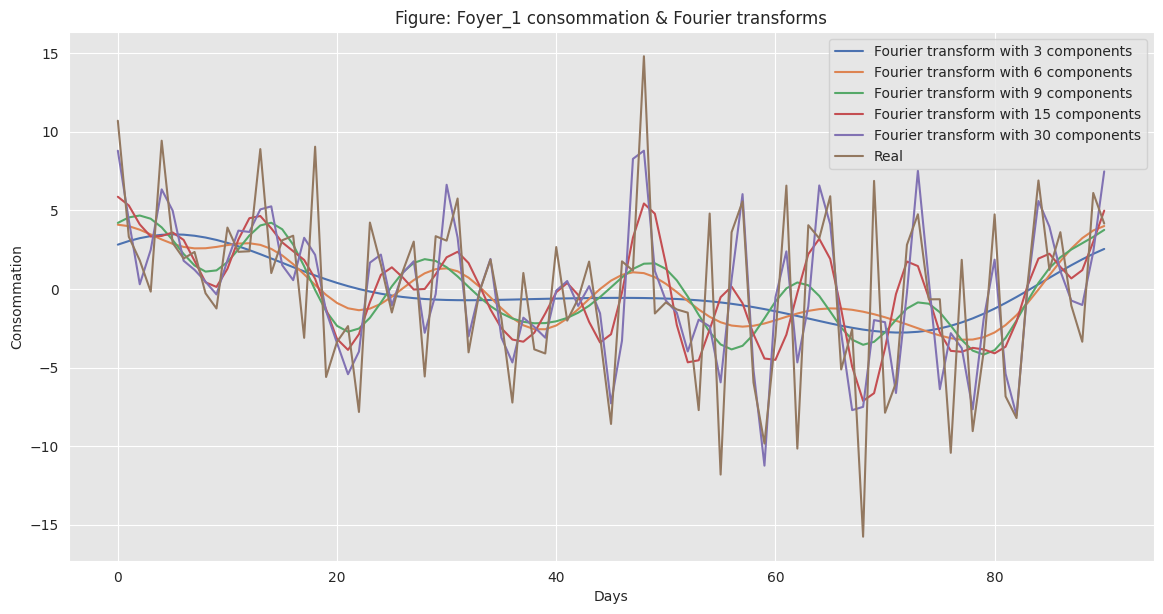

In [41]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 15,30]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['appt_1'],  label='Real')
plt.xlabel('Days')
plt.ylabel('Consommation')
plt.title('Figure: Foyer_1 consommation & Fourier transforms')
plt.legend()
plt.show()

In [42]:
appt10_fft = np.fft.fft(np.asarray(data_FT['appt_10'].tolist()))
fft_df = pd.DataFrame({'fft':appt10_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


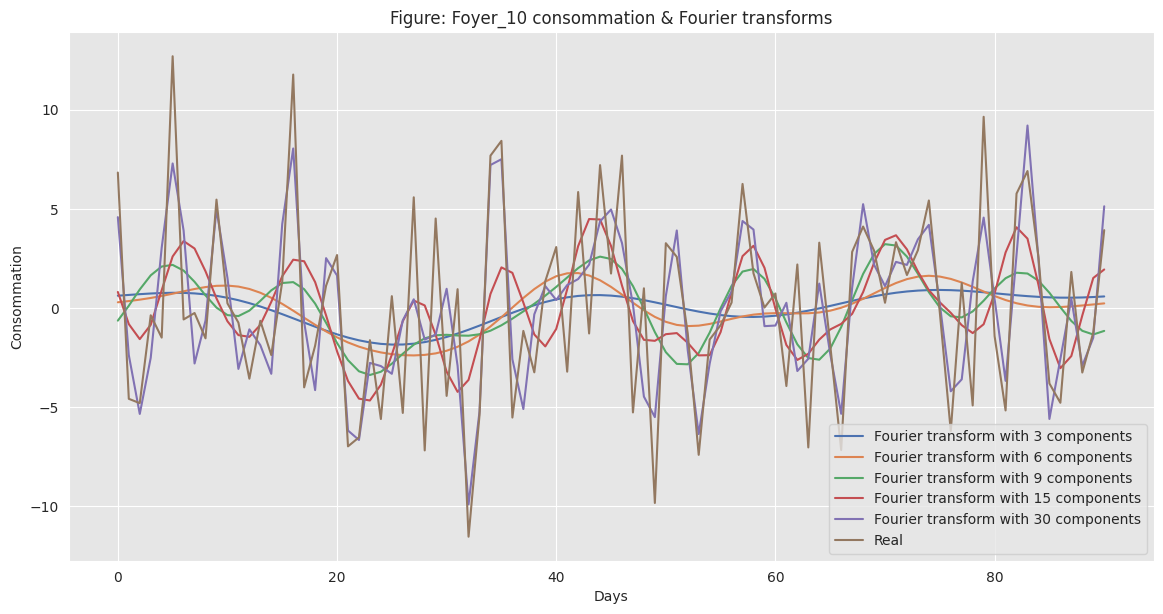

In [43]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 15,30]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['appt_10'],  label='Real')
plt.xlabel('Days')
plt.ylabel('Consommation')
plt.title('Figure: Foyer_10 consommation & Fourier transforms')
plt.legend()
plt.show()

In [44]:
appt3_fft = np.fft.fft(np.asarray(data_FT['appt_20'].tolist()))
fft_df = pd.DataFrame({'fft':appt3_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


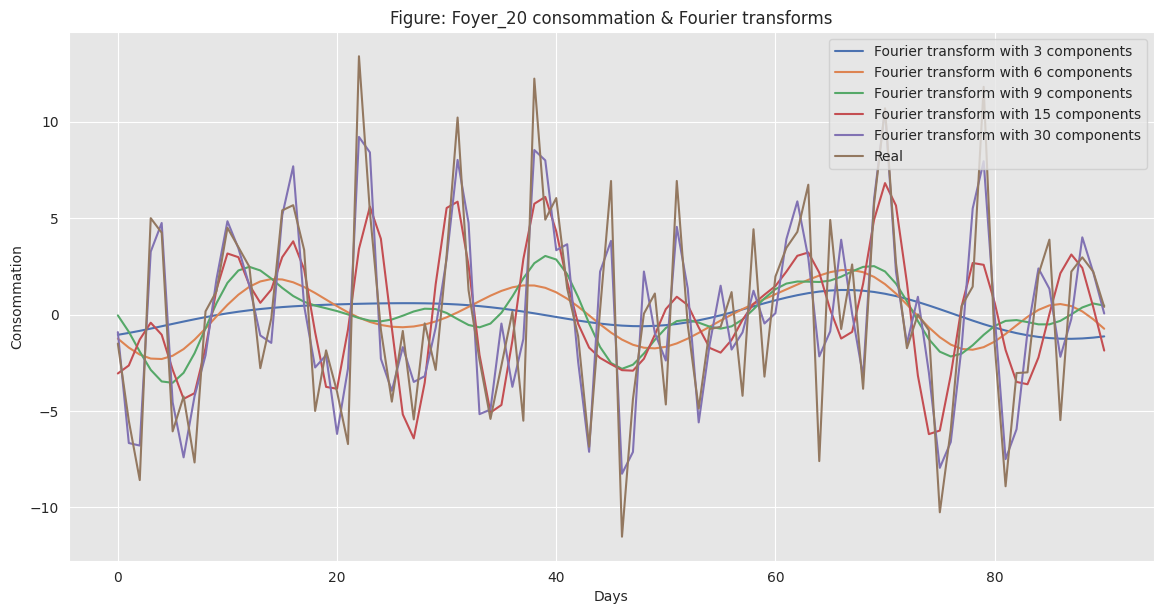

In [45]:
plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 15,30]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['appt_20'],  label='Real')
plt.xlabel('Days')
plt.ylabel('Consommation')
plt.title('Figure: Foyer_20 consommation & Fourier transforms')
plt.legend()
plt.show()

La transformation de Fourier utilise de nombreuses composantes spectrales pour essayer de former les données. Du domaine temporel, elles sont converties en domaine fréquentiel, puis calculées. Après cela, elle est reconvertie dans le domaine temporel où elle est tracée. La transformation de Fourier en tant qu'indicateur permet d'extraire le cycle prédominant d'une série de données.

Référence : https://www.metastock.com/customer/resources/taaz/?p=58

Dans les exemples ci-dessus, nous pouvons voir que la composante spectrale de 30 est la plus proche de la consommation réelle, nous allons donc avancer avec 30.

In [46]:
def get_fourier(dataset):
    data_FT = dataset[df_day.columns.to_list()]
    num_appt=0
    for i in data_FT.columns[1:].tolist():
      num_appt=num_appt+1
      close_fft = np.fft.fft(np.asarray(data_FT[i].tolist()))
      close_fft = np.fft.ifft(close_fft)
      close_fft
      fft_df = pd.DataFrame({'fft':close_fft})
      fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
      fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
      fft_list = np.asarray(fft_df['fft'].tolist())
      fft_list_m10= np.copy(fft_list); fft_list_m10[30:-30]=0
      col_name='Fourier_'+str(num_appt)
      dataset[col_name] = pd.DataFrame(fft_list_m10).apply(lambda x: np.abs(x))
    #dataset['absolute'] = dataset['Fourier'].apply(lambda x: np.abs(x))
    return dataset

In [47]:
dataset=df_day.copy()
dataset_TI_df = get_fourier(dataset)
dataset_TI_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  from ipykernel import kernelapp as app


Day     appt_1    appt_2    appt_3    appt_4    appt_5     appt_6  \
0  01-01  10.695612  2.707761  1.647498 -5.904153 -2.661249   0.654775   
1  01-02   3.317783  0.418042  0.443568  3.828257  1.062960   1.491268   
2  01-03   1.816731 -3.906145  2.425824 -3.463101 -2.683973  11.444573   
3  01-04  -0.170942  0.755987  0.070307 -1.734172  4.439202   6.108568   
4  01-05   9.427071  0.170686  1.081296  1.078066 -1.972080  -5.661369   

     appt_7    appt_8    appt_9  ...  Fourier_91  Fourier_92  Fourier_93  \
0 -1.157198 -2.259596  2.908255  ...    3.991519    1.734392    0.876962   
1 -0.203413  0.929008  8.298131  ...    2.156356    1.475652    1.986360   
2  0.517418  0.066906  1.924546  ...   12.081914    4.045812    3.777372   
3 -5.108810  2.151468  4.823757  ...    0.404964    2.223912    1.802795   
4  3.067871  1.375589 -5.263518  ...    3.896672    1.863383    3.898508   

   Fourier_94  Fourier_95  Fourier_96  Fourier_97  Fourier_98  Fourier_99  \
0    2.435284    1.460960    7.802755    5.488774    2.512723    0.038179   
1    1.328565    3.933832    1.167473    2.837245    2.296679    0.674502   
2    3.555868    1.854796    6.746188    6.590368    1.203642    1.757036   
3    4.237884    7.549328    0.063060   10.240349    8.447088    0.233395   
4    5.057182    4.731564    7.866515    1.337738    4.375373    2.891689   

   Fourier_100  
0     1.193993  
1     0.483624  
2     4.484738  
3     6.750551  
4     5.147485  

[5 rows x 201 columns]

# **4. Clustering**

###**4.1 Classification Hierachique**

Nous commençons par un regroupement par classification hiérarchique. L'avantage d'une telle technique est que nous pouvons décider ici de couper le dendogramme à l'endroit souhaité, pour obtenir des groupes de la taille désirée.

####**a- Méthodes basées sur extraction des caractéristiques**

 Afin d'évaluer nos résultats, nous utilisons l'indice Calinski Harabasz. 

In [48]:
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def CAH(df_reduced, k, dataframe, method_eval_scale=False):
    
    if method_eval_scale == True :
        df_compare = df_scaled
    else:
        df_compare = df_day[df_day.columns[1:]].transpose() # fixe si l'on calcule le score le df originel ou le df normalisé
        
    Z = linkage(df_reduced,method='ward',metric='euclidean')
    plt.title("Classification ascendante hiérarchique")
    dendrogram(Z,orientation='left', color_threshold=3)
    plt.show()
    groupes_cah = fcluster(Z, t = k, criterion= 'maxclust')
    df_cah_1 = pd.DataFrame(groupes_cah)
    df_cah_1["ID"] = df_cah_1.index
    print("Indice de Calinski Harabasz : ", calinski_harabasz_score( X = df_compare, labels = df_cah_1[0]))
    if dataframe == True : 
        return(df_cah_1.set_index("ID", drop = True))
    else : 
        return(df_cah_1.groupby([0]).count())

#print(CAH(df_acp, 5, dataframe = False),'ACP')
#print(CAH(df_features, 6, dataframe = False),'Features')

In [49]:
df_features

Moyenne   Minimum   Maximum  mois_conso_max  mois_conso_min  \
appt_1   -0.002530 -2.712846  2.007661               1               3   
appt_2    0.004413 -2.447783  1.964942               2               1   
appt_3    0.015500 -2.551442  1.927615               1               2   
appt_4    0.006204 -2.653337  2.054251               3               1   
appt_5   -0.015020 -2.467466  2.030829               3               1   
...            ...       ...       ...             ...             ...   
appt_96   0.012919 -2.379652  2.264872               3               4   
appt_97  -0.003102 -2.649557  2.107669               3               1   
appt_98  -0.006116 -2.731046  2.094527               1               3   
appt_99   0.005128 -2.532689  1.971988               3               2   
appt_100  0.005883 -2.876890  1.961424               3               1   

          jour_conso_max  jour_conso_min  
appt_1                48              68  
appt_2                64               7  
appt_3                69              31  
appt_4                59              16  
appt_5                86              19  
...                  ...             ...  
appt_96               22              49  
appt_97               90              37  
appt_98               20              59  
appt_99               89              68  
appt_100              28              24  

[100 rows x 7 columns]

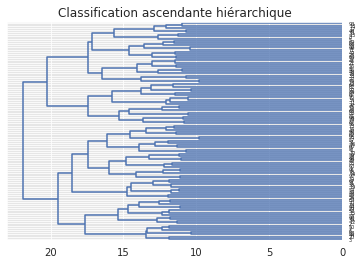

Indice de Calinski Harabasz :  2.574033948513547
   ID
0    
1  53
2  19
3  28 ACP 3


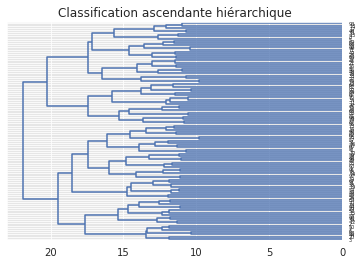

Indice de Calinski Harabasz :  2.7891164020785926
   ID
0    
1  53
2  47 ACP 2


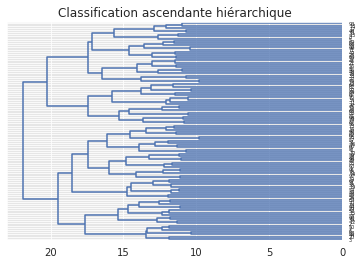

Indice de Calinski Harabasz :  2.172401939603109
   ID
0    
1   7
2  12
3   9
4  25
5  19
6  11
7  17 ACP 7


In [50]:
for k in [3,2,7]:
    print(CAH(df_acp, k, False),'ACP', k)

#### **b- Méthode directe**

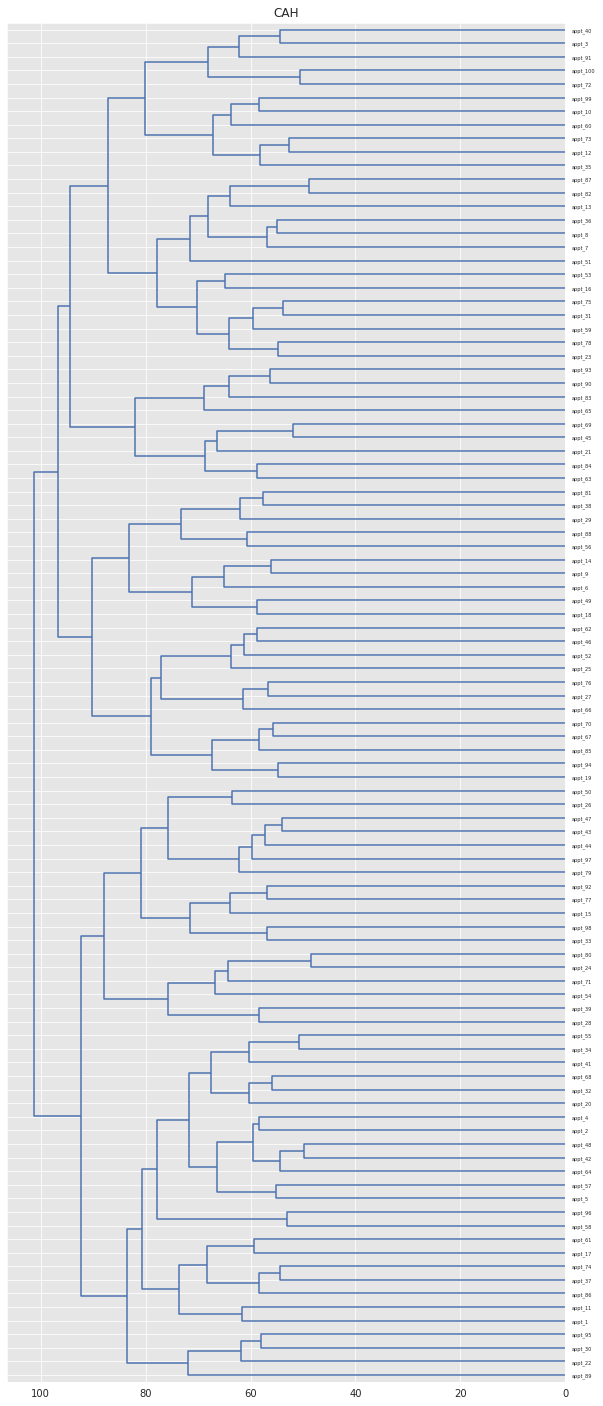

In [51]:
#librairies pour la CAH

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(df_day[df_day.columns[1:]].transpose(),method='ward',

      metric='euclidean')

#affichage du dendrogramme
plt.figure(figsize=(10,25))


plt.title("CAH")

dendrogram(Z,labels=df_day[df_day.columns[1:]].transpose().index,orientation='left',

      color_threshold=0)


plt.show()

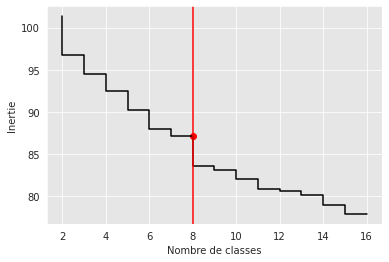

In [52]:
import numpy as np

last = Z[-15:, 2]

last_rev = last[::-1]

idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")

plt.xlabel("Nombre de classes")

plt.ylabel("Inertie")

nombre = 8 # Ici, on teste le scénario où il y aurait 8 catégories

plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red")

plt.axvline(idxs[np.where(idxs==nombre)], c="red")

plt.show()

On voit sur ce graphique 2 grands sauts d'inertie pour 2 et 8 classes. Cela suggère bien qu'une découpe en 2 ou 8 serait pertinente, mais pas au delà !

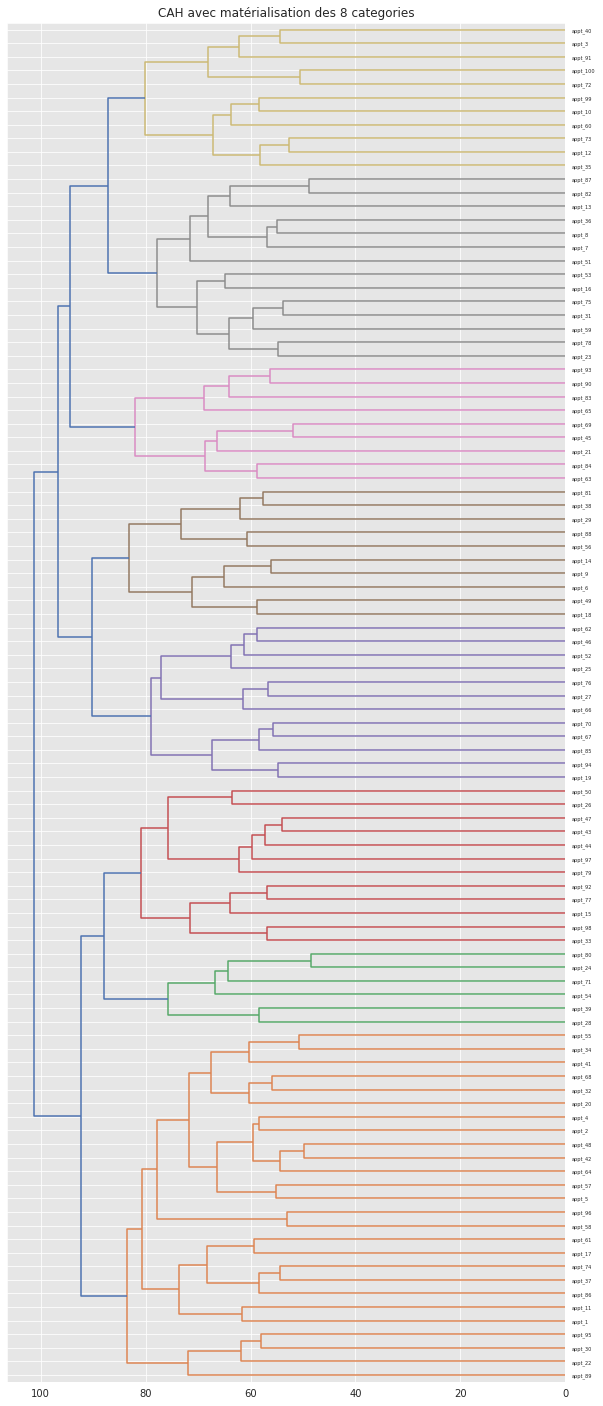

[1 1 8 1 1 5 7 7 5 8 1 8 7 5 3 7 1 5 4 1 6 1 7 2 4 3 4 2 5 1 7 1 3 1 8 7 1
 5 2 8 1 1 3 3 6 4 3 1 5 3 7 4 7 2 1 5 1 1 7 8 1 4 6 1 6 4 4 1 6 4 2 8 8 1
 7 4 3 7 3 2 5 7 6 6 4 1 7 5 1 6 8 3 6 4 1 1 3 3 8 8]


In [53]:
#matérialisation des 8 categories (hauteur t = 85)
plt.figure(figsize=(10,25))

plt.title('CAH avec matérialisation des 8 categories')

dendrogram(Z,labels=df_day[df_day.columns[1:]].transpose().index,orientation='left',color_threshold=85)

plt.show()

#découpage à la hauteur t = 85 groupes obtenus

groupes_cah = fcluster(Z,t=85,criterion='distance')

print(groupes_cah)

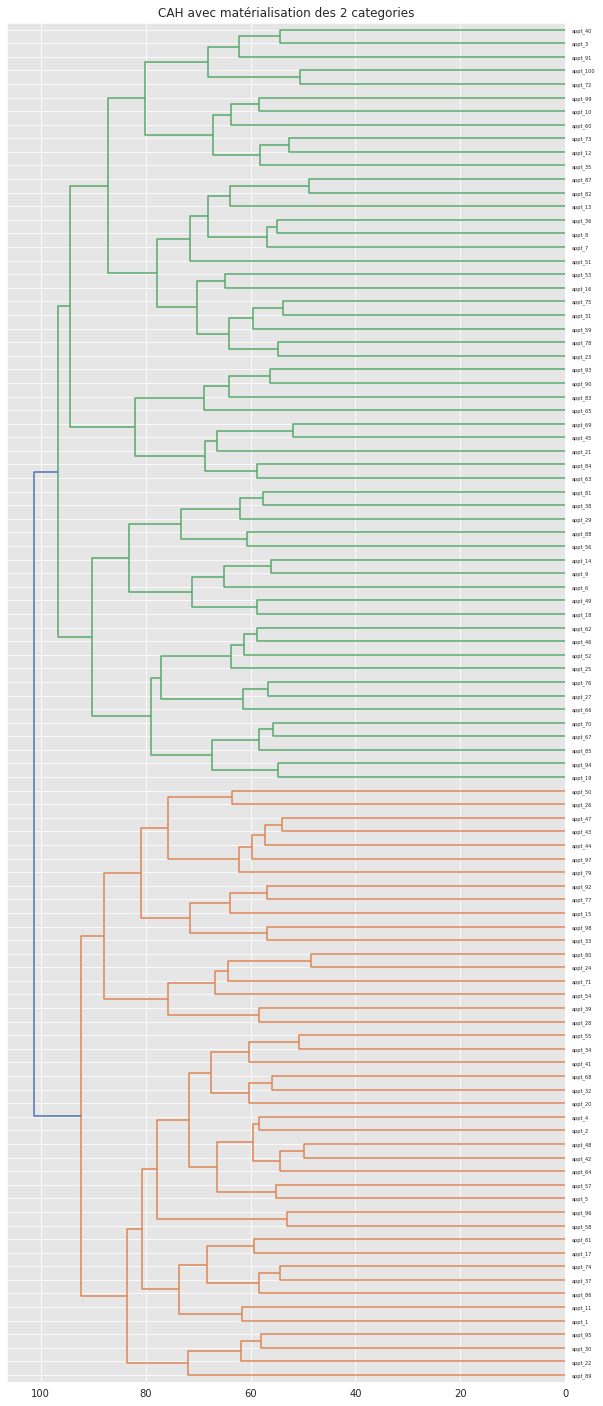

[1 1 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 2 1
 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1
 2 2 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 1 1 1 1 2 2]


In [54]:
#matérialisation des 2 categories (hauteur t = 97)
plt.figure(figsize=(10,25))

plt.title('CAH avec matérialisation des 2 categories')

dendrogram(Z,labels=df_day[df_day.columns[1:]].transpose().index,orientation='left',color_threshold=97)

plt.show()

#découpage à la hauteur t = 97, 2 groupes obtenus

groupes_cah = fcluster(Z,t=97,criterion='distance')

print(groupes_cah)

### **4.2 K-means**

K-Means are the most popular clsutering algorithms, because they are very efficient and scalable. In particular, we can always specify the number of clusters we want to obtain: let's try to look at what is the optimal number of clmuster for each of our df derivatives.

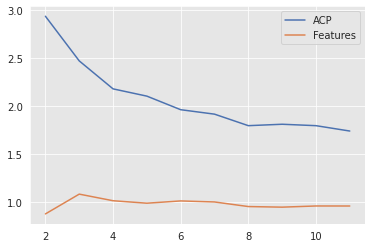

In [55]:
from sklearn.cluster import KMeans

def df_kmeans(data, k, print_groupe, method_eval_scale=False):
    
    if method_eval_scale == True :
        df_compare = df_scaled
    else:
        df_compare = df_day[df_day.columns[1:]].transpose() # fixe si l'on calcule le score le df originel ou le df normalisé
        
    cluster = KMeans(n_clusters = k, random_state = 42)
    cluster.fit(data)
    results = pd.DataFrame(cluster.predict(data))
    indice = calinski_harabasz_score(df_compare, cluster.predict(data))
    if print_groupe == True:
        return(results)
    else :
        return(indice)
L = []
M = []
N = []

for i in range(2, 12): 
    
    M.append(df_kmeans(df_acp, i , print_groupe = False))
    N.append(df_kmeans(df_features, i , print_groupe = False))
    

plt.plot(range(2,12), M, label = "ACP")
plt.plot(range(2,12), N, label = "Features")
plt.legend()


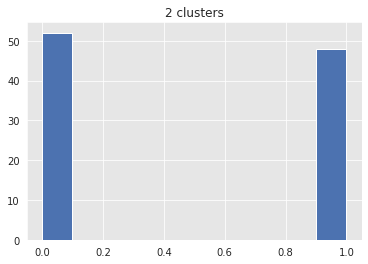

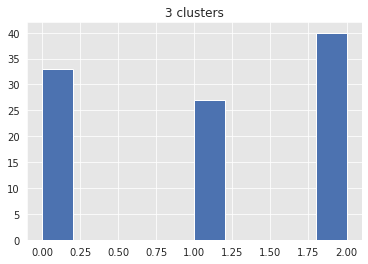

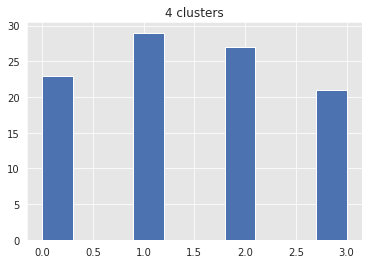

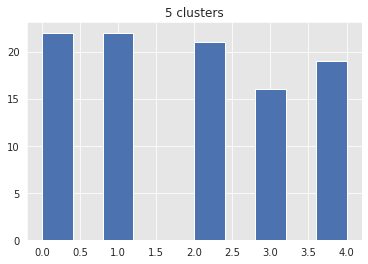

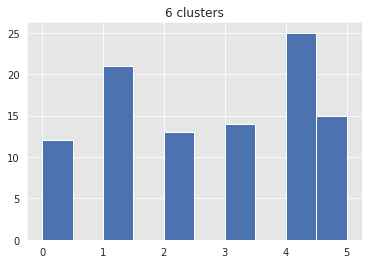

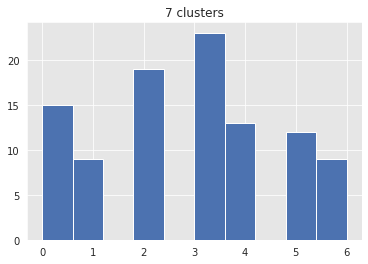

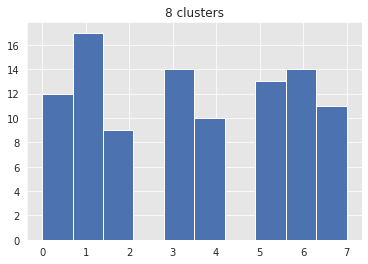

In [56]:
for k in [2,3,4,5,6,7,8]:
    df_kmeans(df_acp, k , True).hist()
    plt.title(label = '{} clusters'.format(k))

In [57]:
df_day[df_day.columns[1:]].transpose()

0         1         2          3         4          5   \
appt_1    10.695612  3.317783  1.816731  -0.170942  9.427071   2.930542   
appt_2     2.707761  0.418042 -3.906145   0.755987  0.170686  10.968174   
appt_3     1.647498  0.443568  2.425824   0.070307  1.081296   2.144220   
appt_4    -5.904153  3.828257 -3.463101  -1.734172  1.078066  -1.762765   
appt_5    -2.661249  1.062960 -2.683973   4.439202 -1.972080  -3.779524   
...             ...       ...       ...        ...       ...        ...   
appt_96   -7.802755 -1.167473 -6.746188   0.063060  7.866515  -2.985956   
appt_97   -5.488774 -2.837245 -6.590368 -10.240349  1.337738   0.771130   
appt_98    2.512723  2.296679 -1.203642   8.447088 -4.375373   3.136551   
appt_99    0.038179 -0.674502  1.757036   0.233395  2.891689  10.142720   
appt_100   1.193993 -0.483624 -4.484738   6.750551  5.147485   0.011044   

                6          7         8          9   ...         81        82  \
appt_1    1.934942   2.353858 -0.273517  -1.242295  ...  -6.830205 -8.209448   
appt_2    2.124044 -14.896906  2.993616  -6.331903  ...   0.404758 -1.891170   
appt_3   -1.654045  -6.224277  8.443819   3.298806  ...  -9.759574 -3.584769   
appt_4   -0.364210  -6.221714 -1.984162   7.700487  ...   5.868654 -0.592517   
appt_5   -2.358911  -3.909017  4.111384  -6.585456  ...  -5.118859  2.316118   
...            ...        ...       ...        ...  ...        ...       ...   
appt_96  -2.069785  -4.042272 -2.063538  -0.984810  ...  10.657842  0.740355   
appt_97  -3.741647   1.316304  2.465821  -0.945893  ...   0.124952 -5.760185   
appt_98   1.835797   6.877287 -3.486919   7.138340  ...  -5.609893 -6.933730   
appt_99  -5.419609  -0.754560 -0.961512  10.586027  ...  -5.237551  6.052877   
appt_100  1.398724  -5.307033  0.740298  -0.994504  ...   0.792817  7.117225   

                83        84        85         86        87        88  \
appt_1    0.239532  6.896935  1.217387   3.610276 -1.061290 -3.357077   
appt_2    2.332111  3.354595 -2.685411  -1.506695  2.510267  1.955998   
appt_3   -0.256895 -4.600055  5.728715   7.172459 -3.063426 -7.615720   
appt_4    3.422490  1.682658  5.671725   8.118207  0.056982  9.015118   
appt_5   -2.225060  6.086256 -2.855952  11.064555  7.715690 -9.530006   
...            ...       ...       ...        ...       ...       ...   
appt_96   1.377736  2.586574 -0.517464   6.339430  3.419279  0.079421   
appt_97  -7.500686  5.444726  5.448364   1.556130  3.664351  7.062429   
appt_98  -7.379604 -3.440074 -4.160071  -4.070036 -2.886960 -4.309335   
appt_99  -2.703786 -0.588804  9.513308  -4.526390  0.246741  4.342880   
appt_100 -1.063236  8.482971  1.290335  -3.539376 -6.097852 -1.893225   

                 89         90  
appt_1     6.104533   4.159973  
appt_2    -0.806511   9.079757  
appt_3     0.171141   2.296061  
appt_4     1.130749  -0.086091  
appt_5    -0.444708  -7.872315  
...             ...        ...  
appt_96    0.311444  -2.374568  
appt_97    3.052979  11.845600  
appt_98   -4.591106  -1.789723  
appt_99   12.513442   7.408875  
appt_100  -5.231414  -0.981601  

[100 rows x 91 columns]


### **4.3 Self-organizing maps: SOM**
 
Les cartes auto-organisatrices sont un type de réseau neuronal qui est formé en utilisant l'apprentissage non supervisé pour produire une représentation à faible dimension de l'espace d'entrée des échantillons de formation, appelée carte.

![SOM](https://raw.githubusercontent.com/izzettunc/Kohonen-SOM/master/data/screenshots/landing.png)
<center>Source : Github Repo: <a href="https://raw.githubusercontent.com/izzettunc/Kohonen-SOM/master/data/screenshots/landing.png">landing.png</a></center>
<br>    
Les cartes auto-organisatrices diffèrent également des autres réseaux neuronaux artificiels car elles appliquent un apprentissage compétitif (ou coopératif) par opposition à l'apprentissage par correction d'erreurs (comme la rétropropagation avec descente de gradient), et dans le sens où elles utilisent une fonction de voisinage pour préserver les propriétés topologiques de l'espace d'entrée.

![Learning process of som](https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif)
<center>Source : Wiki Commons: <a href="https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif">TrainSOM.gif</a></center>
<br>
En raison de sa capacité à produire une carte, le som est considéré comme une méthode de réduction de la dimensionnalité. Mais dans notre cas, lorsque chaque nœud du som est accepté comme medoids du cluster, nous pouvons l'utiliser pour le clustering. Pour ce faire, nous devons supprimer les indices de temps de nos séries temporelles, et au lieu des valeurs mesurées de chaque date, nous devons les accepter comme différentes caractéristiques et dimensions d'un seul point de données.


Pour l'implémentation de l'algorithme som, on a utilisé miniSom et défini nos paramètres comme suit :

- sigma : 0.3
- taux d'apprentissage : 0.5
- initialisation aléatoire des poids
- 50.000 itérations
- Taille de la carte : racine carrée du nombre de séries


In [58]:
df_day.head()

Day     appt_1    appt_2    appt_3    appt_4    appt_5     appt_6  \
0  01-01  10.695612  2.707761  1.647498 -5.904153 -2.661249   0.654775   
1  01-02   3.317783  0.418042  0.443568  3.828257  1.062960   1.491268   
2  01-03   1.816731 -3.906145  2.425824 -3.463101 -2.683973  11.444573   
3  01-04  -0.170942  0.755987  0.070307 -1.734172  4.439202   6.108568   
4  01-05   9.427071  0.170686  1.081296  1.078066 -1.972080  -5.661369   

     appt_7    appt_8    appt_9  ...    appt_91   appt_92   appt_93   appt_94  \
0 -1.157198 -2.259596  2.908255  ...  -3.991519 -1.734392  0.876962 -2.435284   
1 -0.203413  0.929008  8.298131  ...   2.156356 -1.475652 -1.986360 -1.328565   
2  0.517418  0.066906  1.924546  ... -12.081914 -4.045812  3.777372 -3.555868   
3 -5.108810  2.151468  4.823757  ...   0.404964  2.223912  1.802795  4.237884   
4  3.067871  1.375589 -5.263518  ...  -3.896672 -1.863383  3.898508  5.057182   

    appt_95   appt_96    appt_97   appt_98   appt_99  appt_100  
0 -1.460960 -7.802755  -5.488774  2.512723  0.038179  1.193993  
1 -3.933832 -1.167473  -2.837245  2.296679 -0.674502 -0.483624  
2  1.854796 -6.746188  -6.590368 -1.203642  1.757036 -4.484738  
3 -7.549328  0.063060 -10.240349  8.447088  0.233395  6.750551  
4  4.731564  7.866515   1.337738 -4.375373  2.891689  5.147485  

[5 rows x 101 columns]

In [59]:
mySeries=[]
for i in df.columns[1:].to_list():
  df1 = df_day.loc[:,["Day",str(i)]]
        # While we are at it I just filtered the columns that we will be working on
  df1.set_index("Day",inplace=True)
        # ,set the date columns as index
  df1.sort_index(inplace=True)
        # and lastly, ordered the data according to our date index
  mySeries.append(df1)

In [60]:
series_lengths = {len(series) for series in mySeries}
print(series_lengths)

{91}


In [61]:
from sklearn.preprocessing import MinMaxScaler
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [62]:
import math
from minisom import MiniSom
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# we didn't see its significance but to make the map square,
# we calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.5, learning_rate = 0.5)

som.random_weights_init(mySeries)
som.train(mySeries, 100000)


####Results



In [63]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
                cluster_number = x*som_y+y+1
                axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

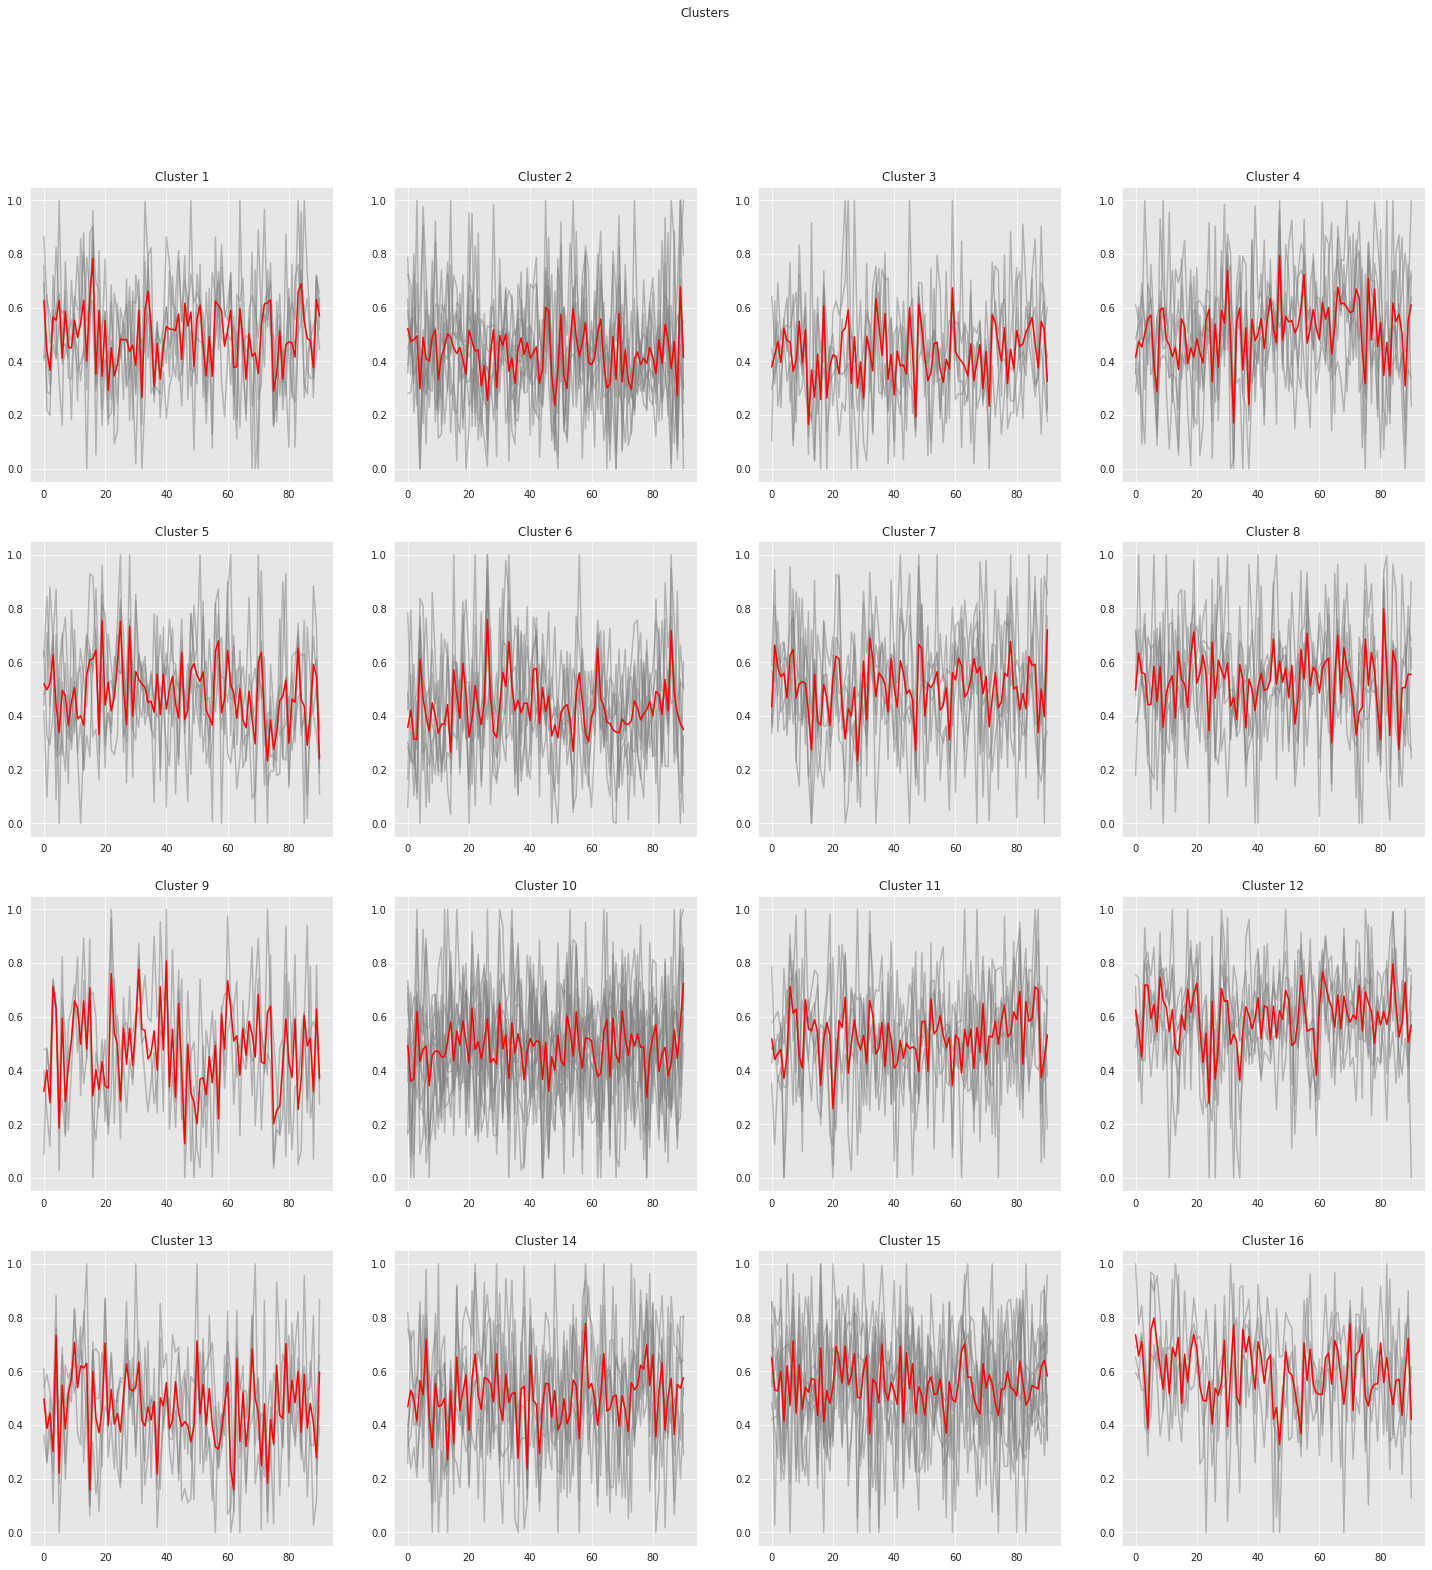

In [64]:
win_map = som.win_map(mySeries)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(som_x, som_y, win_map)

Comme nous pouvons le voir sur le graphique ci-dessous, som a parfaitement regroupé les 100 séries différentes en 16 clusters.



DBA est un autre type de méthode de moyennage qui utilise la méthode Dynamic Time Warping et peut être très utile pour extraire le mouvement/la forme du cluster comme on le voit dans les images suivantes.

![Arithmetic Averaging](https://raw.githubusercontent.com/fpetitjean/DBA/master/images/arithmetic.png)
![DBA](https://raw.githubusercontent.com/fpetitjean/DBA/master/images/DBA.png)




In [65]:
from tslearn.barycenters import dtw_barycenter_averaging
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

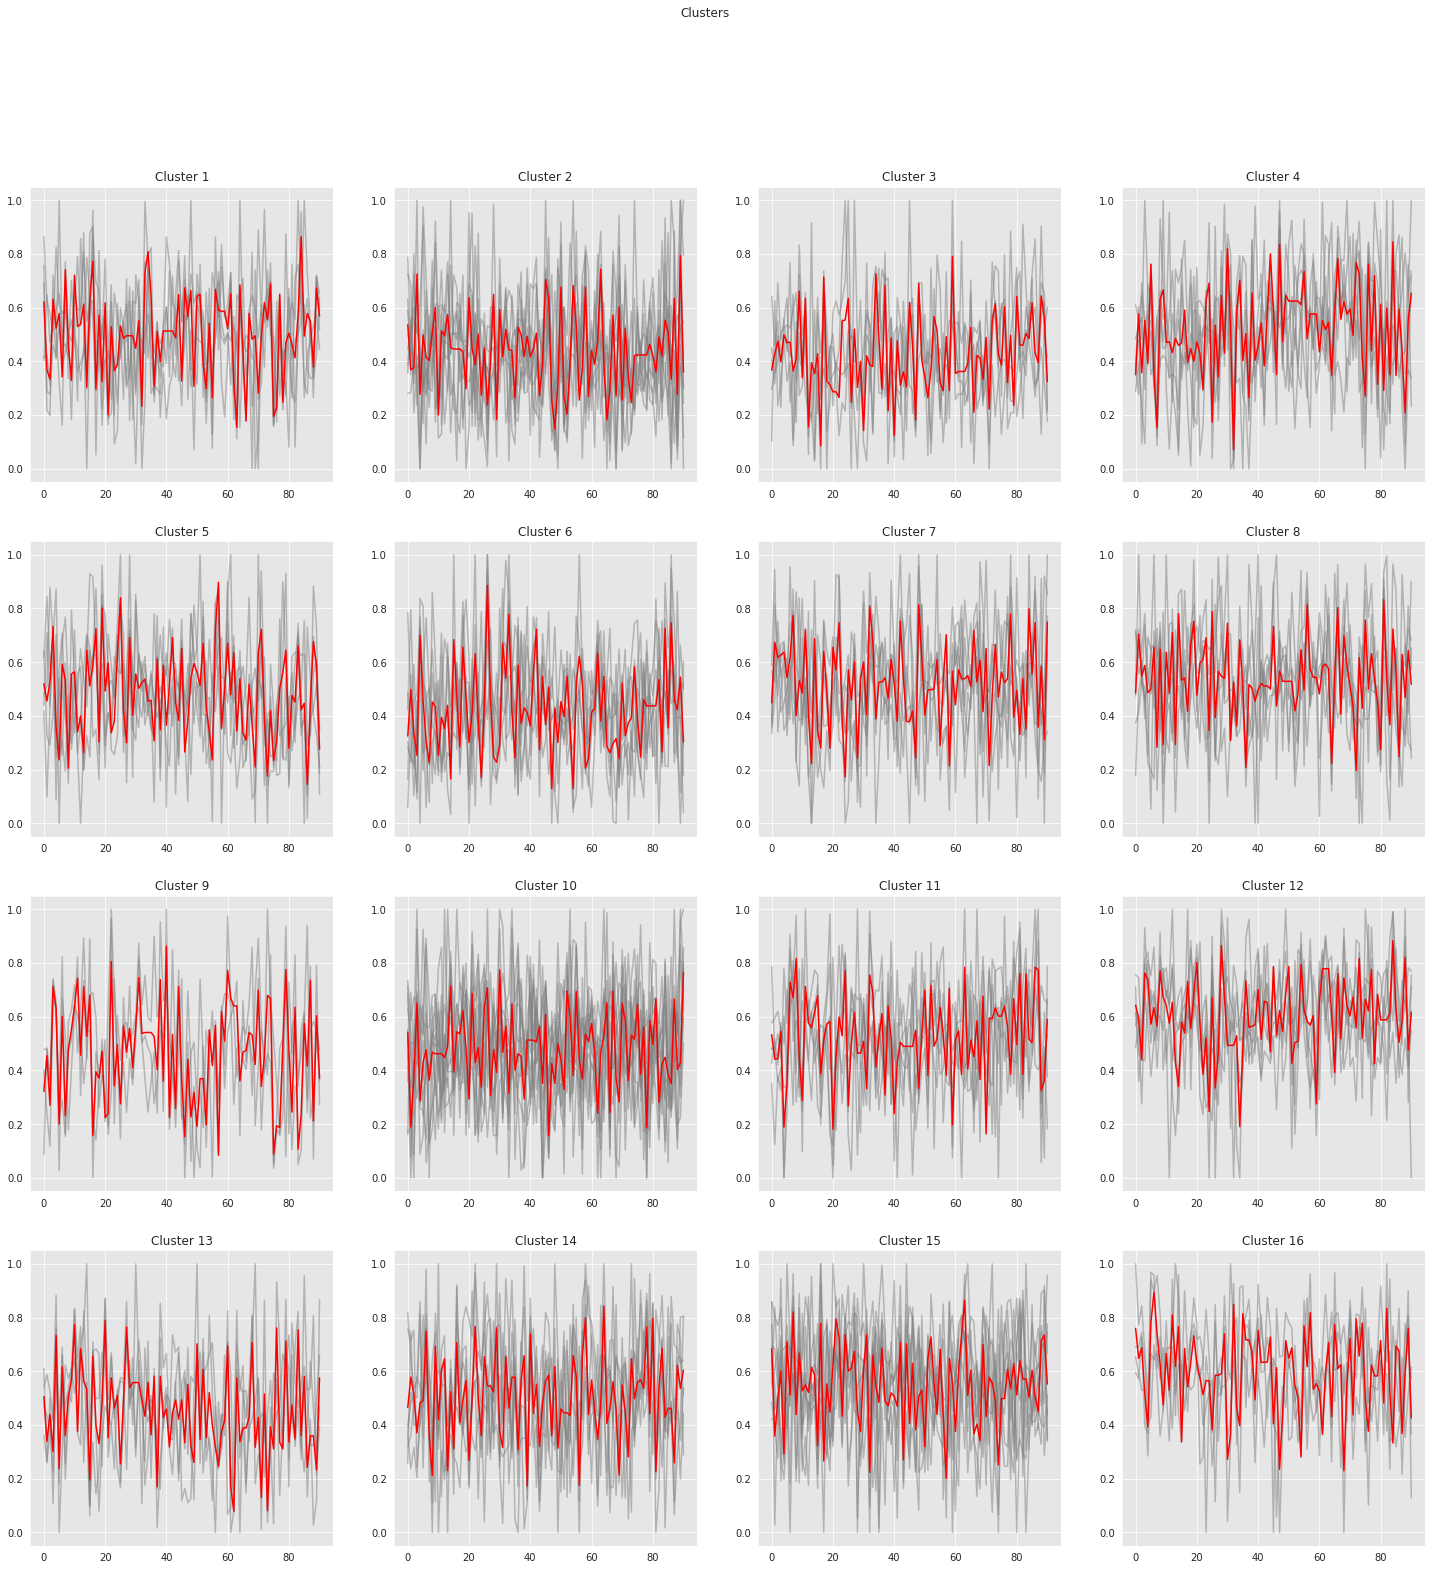

In [66]:
win_map = som.win_map(mySeries)

plot_som_series_dba_center(som_x, som_x, win_map)

Nous ne pouvons pas voir beaucoup de différence avec ce résultat mais, je recommande fortement d'utiliser cette méthode à cette fin. .

#### Cluster Distribution
Nous pouvons voir la distribution des séries chronologiques en grappes dans le graphique suivant.

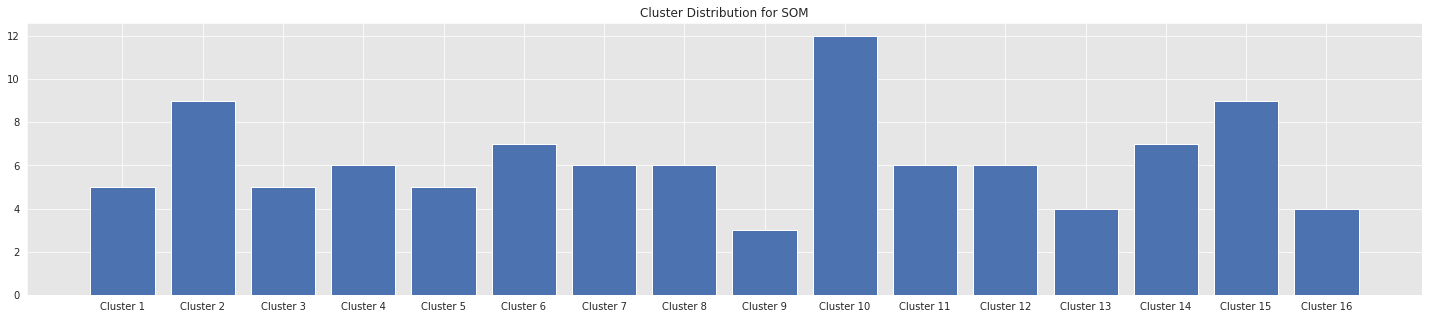

In [67]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.show()

#### Cluster Mapping


Well, we did cluster our series but how de we know which series belonging to which cluster? Ain't that the whole purpose of clustering? <br><br>

As we can see  each node (or multiple of nodes in some cases) represents a cluster. Therefore we can find out which series is belonging to which cluster by checking the winner node of each series. 

In [68]:
# Let's check first 5
for series in mySeries[:5]:
    print(som.winner(series))

(0, 0)
(2, 1)
(0, 3)
(0, 2)
(0, 1)


In order to make this piece of information more appealing to eye, we can map each node to a number <br>

```e.g. for n*m grid (0,0)=1, (0,1)=2, ... (0,m)=m+1, (1,0)=(m+1)+1, (1,1)=(m+1)+2, ... , (n,m)=(n+1)*(m+1) ``` 

and print the name of the series with the cluster number.

In [69]:
namesofMySeries=df_day.columns[1:].to_list()

In [70]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

Cluster
Series            
appt_1   Cluster 1
appt_33  Cluster 1
appt_16  Cluster 1
appt_10  Cluster 1
appt_92  Cluster 1
...            ...
appt_73  Cluster 8
appt_18  Cluster 8
appt_32  Cluster 9
appt_68  Cluster 9
appt_20  Cluster 9

[100 rows x 1 columns]

### 2. 3. 2. K-Means

Le clustering K-means est une méthode qui vise à regrouper n entrées en k clusters dans lesquels chaque point de données appartient au cluster avec la moyenne la plus proche (centroïde du cluster). C'est l'un des algorithmes de clustering les plus populaires et le plus basique.

![Training process](https://i.imgur.com/k4XcapI.gif)

Afin de regrouper nos séries avec k-means, la chose essentielle à faire est, comme nous le faisons avec som, de supprimer les indices de temps de nos séries temporelles, et au lieu des valeurs mesurées de chaque date, nous devrions les accepter comme différentes caractéristiques et dimensions d'un seul point de données. Une autre chose importante à faire est de sélectionner la métrique de distance. Nous utiliserons le Dynamic Time Warping (DTW).



In [71]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

#### Results

Après l'entraînement, on a tracé les résultats comme on l'a fait avec le SOM. Pour chaque cluster, nous avons tracé toutes les séries, un peu en transparence et en gris, et afin de visualiser le mouvement ou la forme du cluster, on a pris la moyenne du cluster et puis on a tracé la série moyenne en rouge.

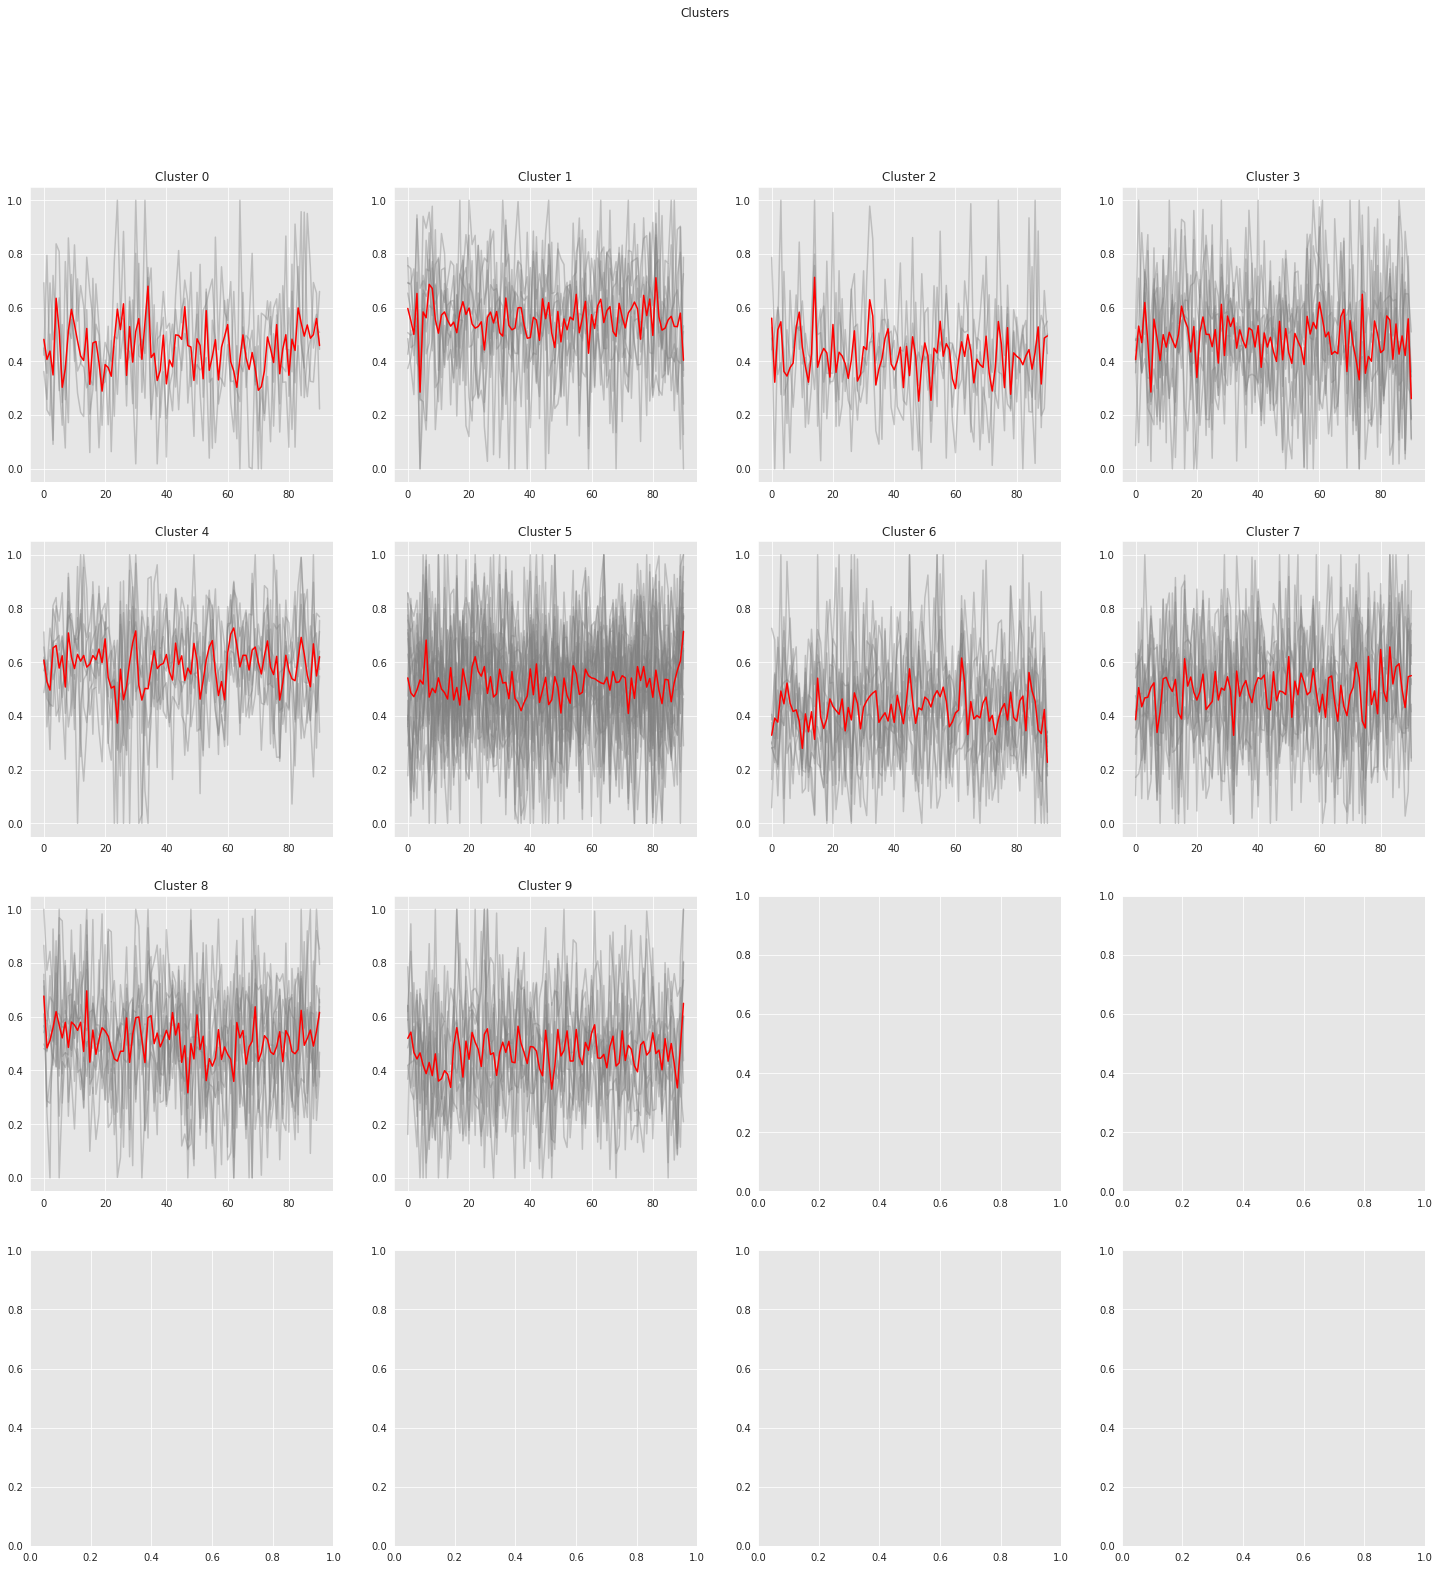

In [72]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

Comme nous pouvez le voir sur le graphique ci-dessus, les k-means ont regroupé les 100 séries différentes en 10 clusters. L'un des clusters ne contient qu'une seule série temporelle qui peut être considérée comme une valeur aberrante.

#### Cluster Distribution

Nous pouvons voir la distribution des séries temporelles en clusters dans le graphique suivant. Et il semble que le k-means a regroupé environ 21 des séries temporelles dans le cluster 3, qui est un peu asymétrique. 


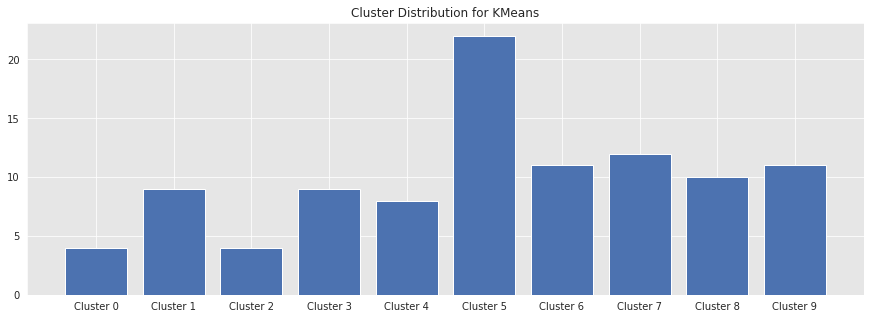

In [73]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

####  Cluster Mapping

As we did before, in this part we will be finding which series belonging to which cluster. Thanks to awesome scikit-learn library we actually already have that information. Order of the labels is the same order with our series.


In [74]:
labels

array([8, 5, 4, 7, 3, 3, 9, 9, 9, 8, 8, 8, 3, 1, 2, 7, 5, 1, 5, 5, 5, 9,
       7, 3, 2, 6, 2, 1, 5, 7, 6, 3, 0, 8, 5, 3, 9, 4, 3, 6, 5, 7, 5, 5,
       9, 1, 1, 4, 6, 1, 6, 8, 1, 6, 4, 5, 2, 9, 3, 5, 5, 5, 9, 7, 0, 6,
       9, 3, 5, 8, 7, 4, 5, 6, 5, 1, 6, 7, 5, 9, 5, 7, 4, 0, 5, 9, 7, 5,
       8, 8, 7, 7, 6, 4, 0, 6, 5, 1, 8, 4])

In [75]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

Cluster
Series            
appt_95  Cluster 0
appt_33  Cluster 0
appt_84  Cluster 0
appt_65  Cluster 0
appt_50  Cluster 1
...            ...
appt_9   Cluster 9
appt_86  Cluster 9
appt_80  Cluster 9
appt_58  Cluster 9
appt_67  Cluster 9

[100 rows x 1 columns]

### **Spectral Clustering**

**Graph laplacian matrix** helpful in eigenvector and value calculations

In [76]:
from scipy.sparse import csgraph

In [77]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df_scaled, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    print(adjacency_matrix_s)
    return graph_laplacian 
    
    
graph_laplacian = generate_graph_laplacian(df=df_day[df_day.columns[1:]].transpose(), nn=8)
print("Graph laplacian", graph_laplacian)
'''
# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian')
'''

  (0, 90)	0.5
  (0, 89)	0.5
  (0, 87)	0.5
  (0, 79)	0.5
  (0, 77)	0.5
  (0, 71)	0.5
  (0, 63)	0.5
  (0, 49)	0.5
  (0, 40)	0.5
  (0, 37)	0.5
  (0, 27)	0.5
  (0, 24)	0.5
  (0, 23)	0.5
  (0, 20)	0.5
  (0, 16)	0.5
  (0, 13)	0.5
  (0, 9)	0.5
  (0, 7)	0.5
  (0, 1)	0.5
  (0, 14)	1.0
  (0, 10)	1.0
  (0, 64)	1.0
  (0, 69)	1.0
  (0, 51)	1.0
  (0, 50)	1.0
  :	:
  (87, 0)	0.5
  (88, 35)	0.5
  (88, 18)	0.5
  (88, 37)	0.5
  (88, 65)	0.5
  (88, 10)	0.5
  (88, 29)	0.5
  (88, 17)	0.5
  (88, 42)	1.0
  (89, 31)	0.5
  (89, 0)	0.5
  (89, 15)	0.5
  (89, 41)	0.5
  (89, 10)	0.5
  (89, 58)	0.5
  (89, 44)	0.5
  (89, 71)	0.5
  (90, 60)	0.5
  (90, 67)	0.5
  (90, 43)	0.5
  (90, 73)	0.5
  (90, 61)	0.5
  (90, 18)	0.5
  (90, 59)	0.5
  (90, 0)	0.5
Graph laplacian [[17.5 -0.5 -1.  ...  0.  -0.5 -0.5]
 [-0.5 11.  -1.  ...  0.   0.   0. ]
 [-1.  -1.  20.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  4.5  0.   0. ]
 [-0.5  0.   0.  ...  0.   4.   0. ]
 [-0.5  0.   0.  ...  0.   0.   4. ]]


"\n# Plot the graph Laplacian as heat map.\nfig, ax = plt.subplots(figsize=(10, 8))\nsns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')\nax.set(title='Graph Laplacian')\n"

[Text(0.5, 1.0, 'Graph Laplacian')]

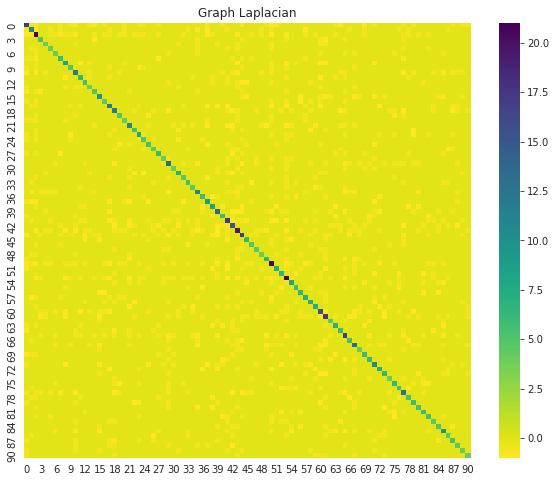

In [78]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian')


EIGENVALUE COMPUTATIONS

In [79]:
from scipy import linalg
eigenvals, eigenvcts = linalg.eig(graph_laplacian)

In [80]:
eigenvals

array([ 2.26440929e+01+0.j,  2.23244011e+01+0.j,  2.09732098e+01+0.j,
        1.99155236e+01+0.j,  1.89105203e+01+0.j,  1.85686708e+01+0.j,
        1.83831103e+01+0.j,  1.80492618e+01+0.j,  1.70472871e+01+0.j,
        1.65800381e+01+0.j,  1.60807238e+01+0.j,  1.46488547e+01+0.j,
        1.41660683e+01+0.j,  1.39031696e+01+0.j,  1.36682086e+01+0.j,
       -3.43795952e-15+0.j,  1.26203459e+01+0.j,  1.23880474e+01+0.j,
        1.22115698e+01+0.j,  1.18085547e+01+0.j,  1.15645932e+01+0.j,
        1.11390201e+01+0.j,  1.06815618e+01+0.j,  1.04916238e+01+0.j,
        9.91780016e+00+0.j,  9.60494817e+00+0.j,  9.07727225e+00+0.j,
        8.89140970e+00+0.j,  8.69090254e+00+0.j,  8.58784308e+00+0.j,
        8.45878919e+00+0.j,  8.22776157e+00+0.j,  8.02292977e+00+0.j,
        7.93203038e+00+0.j,  7.65351786e+00+0.j,  7.28846223e+00+0.j,
        7.42582512e+00+0.j,  7.54327757e+00+0.j,  7.51411373e+00+0.j,
        7.06395486e+00+0.j,  6.83241732e+00+0.j,  6.79914513e+00+0.j,
        6.72817637e+

In [81]:
eigenvcts

array([[ 1.16094996e-01, -1.97199851e-02, -3.45452171e-01, ...,
         1.05217337e-02,  1.14004235e-02, -2.67434115e-03],
       [ 2.09191379e-02, -4.70279361e-02, -3.55048313e-02, ...,
        -9.04046610e-03, -3.25665520e-03, -1.71151495e-02],
       [-1.36612528e-01,  7.25861746e-01,  3.75358841e-01, ...,
         3.85027214e-04, -2.00201898e-02,  1.05928000e-03],
       ...,
       [ 3.13683235e-03,  1.89287202e-03,  1.15121067e-04, ...,
         1.22547946e-01,  9.21648453e-02,  3.70639449e-01],
       [-3.31317820e-03, -3.84214876e-03,  1.09072166e-02, ...,
         8.62014406e-03,  4.19847812e-01,  6.63539999e-02],
       [ 4.23975237e-03,  8.42536894e-03,  2.30492873e-02, ...,
        -5.54482591e-02,  2.79098197e-01, -8.27638194e-02]])

In [82]:
eigenvals.max()

(22.644092883700207+0j)

In [83]:
eigenvals.min()

(-3.4379595166617896e-15+0j)

In [84]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [85]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999998
Max Norm: 1.0000000000000002


In [86]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

Plotting all the eigenvalues

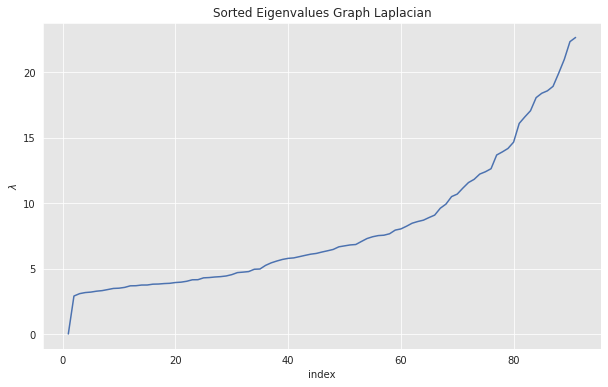

In [87]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

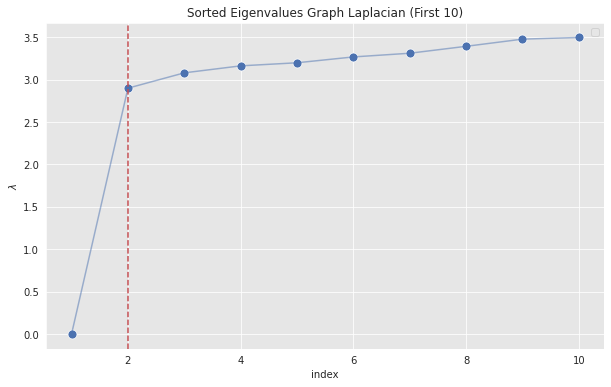

In [88]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=2, color=sns_c[3],  linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [89]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 1e-5)
eigenvals[zero_eigenvals_index]

array([[-3.43795952e-15]])

In [90]:
proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]


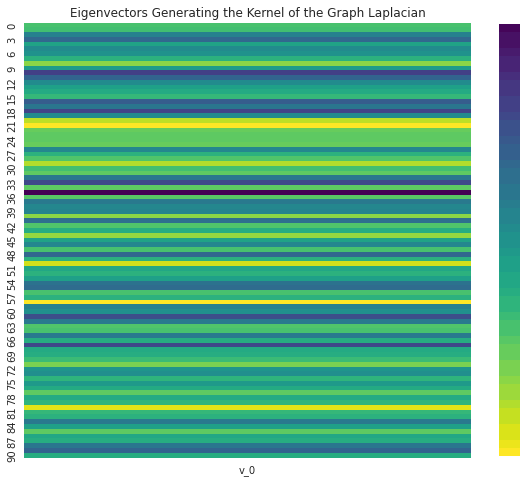

In [91]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');

Deciding which affinity to use for final clustering

In [92]:
from sklearn.cluster import SpectralClustering

In [93]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(df_day[df_day.columns[1:]].transpose())
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(df_day[df_day.columns[1:]].transpose())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [94]:
from sklearn.metrics import silhouette_score

In [95]:
affinity = ['rbf', 'nearest-neighbours']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(df_day[df_day.columns[1:]].transpose(), labels_rbf))
s_scores.append(silhouette_score(df_day[df_day.columns[1:]].transpose(), labels_nn))
  
print(s_scores)

[-0.0007251892579104199, 0.020054497764571175]


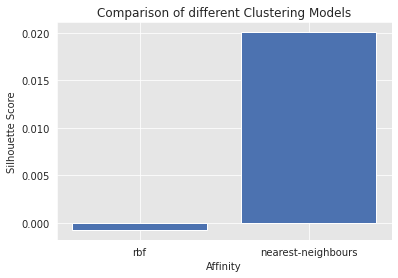

In [96]:
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

nearest neighbours does so much better than rbf


In [97]:
from sklearn.metrics import davies_bouldin_score

In [98]:
data1 = df_day[df_day.columns[1:]].transpose().copy()

In [99]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df

###Final Clustering

In [100]:
from sklearn.cluster import SpectralClustering
plt.rcParams["figure.figsize"] = (12,8)
spec_cl = SpectralClustering(
    n_clusters=2, 
    random_state=25, 
    n_neighbors=10, 
    affinity='nearest_neighbors'
)
data1['cluster'] = spec_cl.fit_predict(data1)
data1['cluster'] = ['c_' + str(c) for c in data1['cluster']]



In [101]:
data1

0         1         2          3         4          5  \
appt_1    10.695612  3.317783  1.816731  -0.170942  9.427071   2.930542   
appt_2     2.707761  0.418042 -3.906145   0.755987  0.170686  10.968174   
appt_3     1.647498  0.443568  2.425824   0.070307  1.081296   2.144220   
appt_4    -5.904153  3.828257 -3.463101  -1.734172  1.078066  -1.762765   
appt_5    -2.661249  1.062960 -2.683973   4.439202 -1.972080  -3.779524   
...             ...       ...       ...        ...       ...        ...   
appt_96   -7.802755 -1.167473 -6.746188   0.063060  7.866515  -2.985956   
appt_97   -5.488774 -2.837245 -6.590368 -10.240349  1.337738   0.771130   
appt_98    2.512723  2.296679 -1.203642   8.447088 -4.375373   3.136551   
appt_99    0.038179 -0.674502  1.757036   0.233395  2.891689  10.142720   
appt_100   1.193993 -0.483624 -4.484738   6.750551  5.147485   0.011044   

                 6          7         8          9  ...        82        83  \
appt_1    1.934942   2.353858 -0.273517  -1.242295  ... -8.209448  0.239532   
appt_2    2.124044 -14.896906  2.993616  -6.331903  ... -1.891170  2.332111   
appt_3   -1.654045  -6.224277  8.443819   3.298806  ... -3.584769 -0.256895   
appt_4   -0.364210  -6.221714 -1.984162   7.700487  ... -0.592517  3.422490   
appt_5   -2.358911  -3.909017  4.111384  -6.585456  ...  2.316118 -2.225060   
...            ...        ...       ...        ...  ...       ...       ...   
appt_96  -2.069785  -4.042272 -2.063538  -0.984810  ...  0.740355  1.377736   
appt_97  -3.741647   1.316304  2.465821  -0.945893  ... -5.760185 -7.500686   
appt_98   1.835797   6.877287 -3.486919   7.138340  ... -6.933730 -7.379604   
appt_99  -5.419609  -0.754560 -0.961512  10.586027  ...  6.052877 -2.703786   
appt_100  1.398724  -5.307033  0.740298  -0.994504  ...  7.117225 -1.063236   

                84        85         86        87        88         89  \
appt_1    6.896935  1.217387   3.610276 -1.061290 -3.357077   6.104533   
appt_2    3.354595 -2.685411  -1.506695  2.510267  1.955998  -0.806511   
appt_3   -4.600055  5.728715   7.172459 -3.063426 -7.615720   0.171141   
appt_4    1.682658  5.671725   8.118207  0.056982  9.015118   1.130749   
appt_5    6.086256 -2.855952  11.064555  7.715690 -9.530006  -0.444708   
...            ...       ...        ...       ...       ...        ...   
appt_96   2.586574 -0.517464   6.339430  3.419279  0.079421   0.311444   
appt_97   5.444726  5.448364   1.556130  3.664351  7.062429   3.052979   
appt_98  -3.440074 -4.160071  -4.070036 -2.886960 -4.309335  -4.591106   
appt_99  -0.588804  9.513308  -4.526390  0.246741  4.342880  12.513442   
appt_100  8.482971  1.290335  -3.539376 -6.097852 -1.893225  -5.231414   

                 90  cluster  
appt_1     4.159973      c_1  
appt_2     9.079757      c_1  
appt_3     2.296061      c_1  
appt_4    -0.086091      c_1  
appt_5    -7.872315      c_0  
...             ...      ...  
appt_96   -2.374568      c_1  
appt_97   11.845600      c_1  
appt_98   -1.789723      c_1  
appt_99    7.408875      c_0  
appt_100  -0.981601      c_0  

[100 rows x 92 columns]

In [121]:
data1['cluster']

appt_1      c_1
appt_2      c_1
appt_3      c_1
appt_4      c_1
appt_5      c_0
           ... 
appt_96     c_1
appt_97     c_1
appt_98     c_1
appt_99     c_0
appt_100    c_0
Name: cluster, Length: 100, dtype: object

## **Analyse sur clusters**

In [122]:
def analyse_clustering(dataframe):
    
    data_represent = dataframe.groupby('cluster').median()
    liste_represent = data_represent.index
    data_represent = data_represent.transpose()
    data_represent["Time"] = df_day['Day']
    x=data_represent.copy()
    x = x.groupby(df_day['Day']).mean()
    
    fig = plt.figure(figsize = [12, 4.8])
    a1 = fig.add_axes([0,0,1,1]) 
    a1.set_ylabel('Consommation électrique')
    plt.xticks(np.arange(len(x), step = 31), calendar.month_name[1:6]+calendar.month_name[7:12], rotation=20)  
    plt.title('Courbes de consommation moyenne journalière sur  91 jours par foyer' )
    
    for profil in liste_represent:
        plt.plot(x[profil], label= 'Foyer %s' % profil) #boucle if qui permet de toujours avoir une belle légende
    
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
  

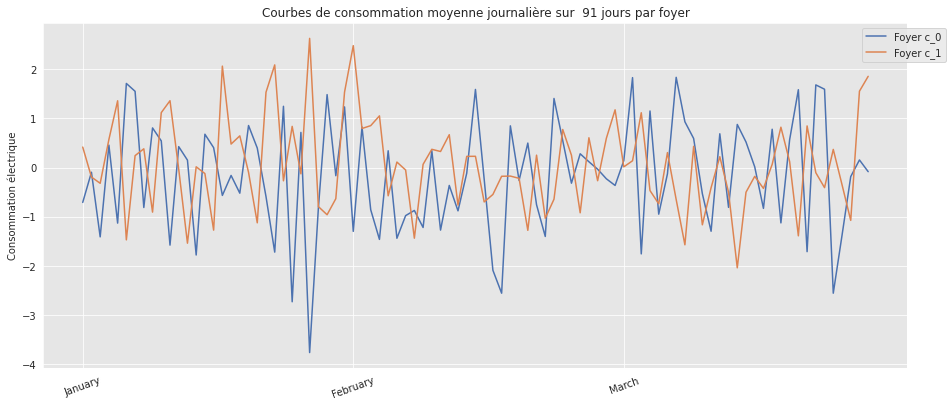

In [123]:
analyse_clustering(data1)

# **Segmentation**

In [111]:
data_represent = data1.groupby('cluster').median()
liste_represent = data_represent.index
data_represent = data_represent.transpose()
data_represent["Time"] = df_day['Day']

In [113]:
d=data_represent.copy()

In [116]:
#Convert the time series values to a numpy 1D array
points1=np.array(d['c_0'])
points2=np.array(d['c_1'])

### **Algorithme de Programmation Dynamique**

Il s'agit d'une méthode exacte, qui a un coût de calcul considérable de O(Qn^2 ), où Q est le nombre maximal de points de changement et "n" est le nombre de points de données.

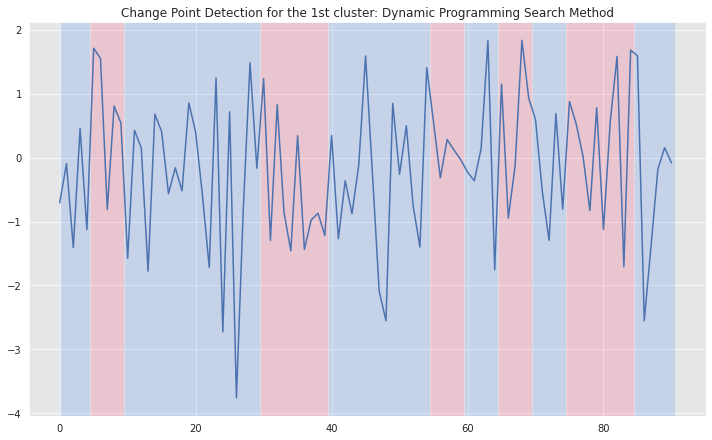

In [117]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points1)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for the 1st cluster: Dynamic Programming Search Method')
plt.show()

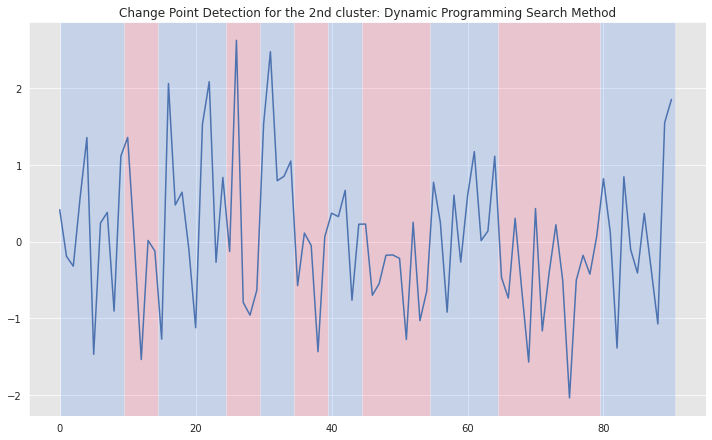

In [118]:
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points2)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points2, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for the 2nd cluster: Dynamic Programming Search Method')
plt.show()

### **Binary Segmentation Search Method**

Cette méthode est sans doute la plus établie dans la littérature. La segmentation binaire est une méthode approximative avec un coût de calcul efficace de O (n log n), où n est le nombre de points de données.

 L'algorithme fonctionne en appliquant de manière itérative une méthode de point de changement unique à l'ensemble de la séquence pour déterminer si une division existe. Si une division est détectée, la séquence se divise en deux sous-séquences. Le même processus est alors appliqué aux deux sous-séquences, et ainsi de suite.

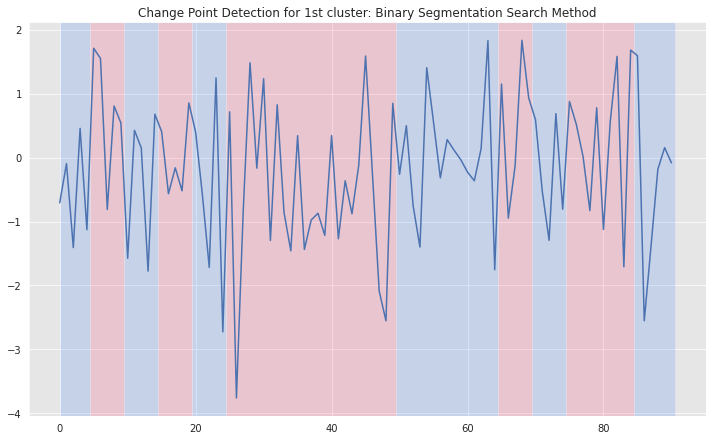

In [124]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points1)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points1, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for 1st cluster: Binary Segmentation Search Method')
plt.show()
    

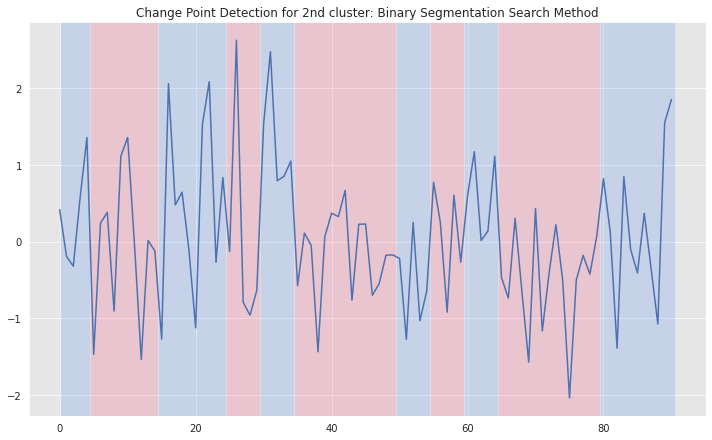

In [125]:
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points2)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points2, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection for 2nd cluster: Binary Segmentation Search Method')
plt.show()
    